In [590]:
pip install xgboost

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler #No normales con outlier
from sklearn.preprocessing import MinMaxScaler #No normales sin outlier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.image as mpimg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
import joblib

In [592]:
Precio_alquiler= pd.read_csv(r'C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Precio_anual.csv')
Precio_alquiler

Any  Codi_Districte Nom_Districte  Codi_Barri  \
0   2023               1  Ciutat Vella           1   
1   2023               1  Ciutat Vella           2   
2   2023               1  Ciutat Vella           3   
3   2023               1  Ciutat Vella           4   
4   2023               2      Eixample           5   
..   ...             ...           ...         ...   
68  2023              10    Sant Martí          69   
69  2023              10    Sant Martí          70   
70  2023              10    Sant Martí          71   
71  2023              10    Sant Martí          72   
72  2023              10    Sant Martí          73   

                                       Nom_Barri  \
0                                       el Raval   
1                                 el Barri Gòtic   
2                                 la Barceloneta   
3          Sant Pere, Santa Caterina i la Ribera   
4                                  el Fort Pienc   
..                                           ...   
68  Diagonal Mar i el Front Marítim del Poblenou   
69                         el Besòs i el Maresme   
70                       Provençals del Poblenou   
71                      Sant Martí de Provençals   
72                           la Verneda i la Pau   

                        Lloguer_mitja  Precio anual  
0   Lloguer mitjà mensual (Euros/mes)        926.10  
1   Lloguer mitjà mensual (Euros/mes)       1286.70  
2   Lloguer mitjà mensual (Euros/mes)        990.45  
3   Lloguer mitjà mensual (Euros/mes)       1086.65  
4   Lloguer mitjà mensual (Euros/mes)       1170.60  
..                                ...           ...  
68  Lloguer mitjà mensual (Euros/mes)       1444.35  
69  Lloguer mitjà mensual (Euros/mes)        777.25  
70  Lloguer mitjà mensual (Euros/mes)       1187.35  
71  Lloguer mitjà mensual (Euros/mes)        943.10  
72  Lloguer mitjà mensual (Euros/mes)       1069.75  

[73 rows x 7 columns]

In [593]:
Cultural_ocio= pd.read_csv(r'C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Cultural_ocio.csv')

In [594]:
Autobuses= pd.read_csv(r'C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Autobuses.csv')

In [595]:
Aparcamientos= pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Aparcamiento.csv")

In [596]:
Seguridad= pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Seguridad.csv")

In [597]:
Equip_sanitario= pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Equip_sanitario.csv")

In [598]:
Instalaciones_deportivas= pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Instalaciones_deportivas.csv")

In [599]:
Contratos = pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Contratos.csv")

In [600]:
superficie = pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\superficie.csv")

In [601]:
Med_hab = pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Med_hab.csv")

In [602]:
Med_baños = pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Med_baños.csv")

In [603]:
Med_personas = pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Med_personas.csv")

Cargo todos mos conjuntos de datos que cada uno contiene las variables que quiero combinar.

In [604]:
Alquiler_data = pd.merge(Precio_alquiler, Cultural_ocio, on="Codi_Barri", how='left')

In [605]:
Alquiler_data = pd.merge(Alquiler_data, Autobuses, on="Codi_Barri", how='left')

In [606]:
Alquiler_data = pd.merge(Alquiler_data, Aparcamientos, on="Codi_Barri", how='left')

In [607]:
Alquiler_data = pd.merge(Alquiler_data, Seguridad, on="Codi_Barri", how='left')

In [608]:
Alquiler_data = pd.merge(Alquiler_data, Equip_sanitario, on="Codi_Barri", how='left')

In [609]:
Alquiler_data = pd.merge(Alquiler_data, Instalaciones_deportivas, on="Codi_Barri", how='left')

In [610]:
Alquiler_data = pd.merge(Alquiler_data, Contratos, on="Codi_Barri", how='left')

In [611]:
Alquiler_data = pd.merge(Alquiler_data, superficie, on="Codi_Barri", how='left')

In [612]:
Alquiler_data = pd.merge(Alquiler_data, Med_hab, on="Codi_Districte", how='left')

In [613]:
Alquiler_data = pd.merge(Alquiler_data, Med_baños, on="Codi_Districte", how='left')

In [614]:
Alquiler_data = pd.merge(Alquiler_data, Med_personas, on="Codi_Districte", how='left')

Luego con .merge, uno todos los dataset en uno solo ( alquilee_data ), para obtener por cada variable una columna en un solo dataset.

In [615]:
Alquiler_data
pd.set_option('display.max_columns', 500)

In [617]:
Alquiler_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Any                                       73 non-null     int64  
 1   Codi_Districte                            73 non-null     int64  
 2   Nom_Districte                             73 non-null     object 
 3   Codi_Barri                                73 non-null     int64  
 4   Nom_Barri                                 73 non-null     object 
 5   Lloguer_mitja                             73 non-null     object 
 6   Precio anual                              73 non-null     float64
 7   Centres cívics                            73 non-null     int64  
 8   Interiors d'illa                          73 non-null     int64  
 9   Museos                                    73 non-null     int64  
 10  Ocio nocturno                           

Al final tengo un dataset con 27 columnas, cada una representa una variable y las fuilas representan un barrio con una codigicacion y un distrito con una codoficacion 

In [618]:
Alquiler_data[Alquiler_data.duplicated()]

Empty DataFrame
Columns: [Any, Codi_Districte, Nom_Districte, Codi_Barri, Nom_Barri, Lloguer_mitja, Precio anual, Centres cívics, Interiors d'illa, Museos, Ocio nocturno, Parcs i jardins, Restaurants, Universitats, Zoo, Autobus dia, Autobus noche, Aparcamientos, Aparcamientos con plazas para bicicletas, Camaras_seguridad, Hospitals, Installacions esportives, Total_contratos, m2, Med_Hab, Med_baños, Med_Pers]
Index: []

No hay duplicados, por tanto nuestro conjunto de datos debe contener 73 filas

In [619]:
Alquiler_data[Alquiler_data.isnull().any(axis=1)]

Any  Codi_Districte        Nom_Districte  Codi_Barri  \
3   2023               1         Ciutat Vella           4   
11  2023               3       Sants-Montjuïc          12   
13  2023               3       Sants-Montjuïc          14   
14  2023               3       Sants-Montjuïc          15   
16  2023               3       Sants-Montjuïc          17   
20  2023               4            Les Corts          21   
21  2023               5  Sarrià-Sant Gervasi          22   
28  2023               6               Gràcia          29   
31  2023               6               Gràcia          32   
33  2023               7       Horta-Guinardó          34   
35  2023               7       Horta-Guinardó          36   
36  2023               7       Horta-Guinardó          37   
37  2023               7       Horta-Guinardó          38   
38  2023               7       Horta-Guinardó          39   
39  2023               7       Horta-Guinardó          40   
40  2023               7       Horta-Guinardó          41   
41  2023               7       Horta-Guinardó          42   
44  2023               8           Nou Barris          45   
45  2023               8           Nou Barris          46   
46  2023               8           Nou Barris          47   
47  2023               8           Nou Barris          48   
48  2023               8           Nou Barris          49   
49  2023               8           Nou Barris          50   
50  2023               8           Nou Barris          51   
52  2023               8           Nou Barris          53   
53  2023               8           Nou Barris          54   
54  2023               8           Nou Barris          55   
55  2023               8           Nou Barris          56   
56  2023               9          Sant Andreu          57   
57  2023               9          Sant Andreu          58   
58  2023               9          Sant Andreu          59   
61  2023               9          Sant Andreu          62   
62  2023               9          Sant Andreu          63   
63  2023              10           Sant Martí          64   
65  2023              10           Sant Martí          66   
69  2023              10           Sant Martí          70   
71  2023              10           Sant Martí          72   
72  2023              10           Sant Martí          73   

                                Nom_Barri                      Lloguer_mitja  \
3   Sant Pere, Santa Caterina i la Ribera  Lloguer mitjà mensual (Euros/mes)   
11             la Marina del Prat Vermell  Lloguer mitjà mensual (Euros/mes)   
13                  la Font de la Guatlla  Lloguer mitjà mensual (Euros/mes)   
14                            Hostafrancs  Lloguer mitjà mensual (Euros/mes)   
16                          Sants - Badal  Lloguer mitjà mensual (Euros/mes)   
20                              Pedralbes  Lloguer mitjà mensual (Euros/mes)   
21  Vallvidrera, el Tibidabo i les Planes  Lloguer mitjà mensual (Euros/mes)   
28                                el Coll  Lloguer mitjà mensual (Euros/mes)   
31     el Camp d'en Grassot i Gràcia Nova  Lloguer mitjà mensual (Euros/mes)   
33                               Can Baró  Lloguer mitjà mensual (Euros/mes)   
35                   la Font d'en Fargues  Lloguer mitjà mensual (Euros/mes)   
36                              el Carmel  Lloguer mitjà mensual (Euros/mes)   
37                           la Teixonera  Lloguer mitjà mensual (Euros/mes)   
38               Sant Genís dels Agudells  Lloguer mitjà mensual (Euros/mes)   
39                                Montbau  Lloguer mitjà mensual (Euros/mes)   
40                       la Vall d'Hebron  Lloguer mitjà mensual (Euros/mes)   
41                               la Clota  Lloguer mitjà mensual (Euros/mes)   
44                                  Porta  Lloguer mitjà mensual (Euros/mes)   
45                    el Turó de la Peira  Lloguer mitjà mensual (Euros/mes)   
46                       

In [620]:
Alquiler_data.fillna(0, inplace=True)

Los nulos los convertimos en ceros, pues para nosotors si es importante saber cantidades, Nan representaria en este caso la aucencia.

In [621]:
Alquiler_data.head(73)

Any  Codi_Districte Nom_Districte  Codi_Barri  \
0   2023               1  Ciutat Vella           1   
1   2023               1  Ciutat Vella           2   
2   2023               1  Ciutat Vella           3   
3   2023               1  Ciutat Vella           4   
4   2023               2      Eixample           5   
..   ...             ...           ...         ...   
68  2023              10    Sant Martí          69   
69  2023              10    Sant Martí          70   
70  2023              10    Sant Martí          71   
71  2023              10    Sant Martí          72   
72  2023              10    Sant Martí          73   

                                       Nom_Barri  \
0                                       el Raval   
1                                 el Barri Gòtic   
2                                 la Barceloneta   
3          Sant Pere, Santa Caterina i la Ribera   
4                                  el Fort Pienc   
..                                           ...   
68  Diagonal Mar i el Front Marítim del Poblenou   
69                         el Besòs i el Maresme   
70                       Provençals del Poblenou   
71                      Sant Martí de Provençals   
72                           la Verneda i la Pau   

                        Lloguer_mitja  Precio anual  Centres cívics  \
0   Lloguer mitjà mensual (Euros/mes)        926.10              43   
1   Lloguer mitjà mensual (Euros/mes)       1286.70              24   
2   Lloguer mitjà mensual (Euros/mes)        990.45              17   
3   Lloguer mitjà mensual (Euros/mes)       1086.65              28   
4   Lloguer mitjà mensual (Euros/mes)       1170.60              14   
..                                ...           ...             ...   
68  Lloguer mitjà mensual (Euros/mes)       1444.35               3   
69  Lloguer mitjà mensual (Euros/mes)        777.25               9   
70  Lloguer mitjà mensual (Euros/mes)       1187.35               3   
71  Lloguer mitjà mensual (Euros/mes)        943.10              11   
72  Lloguer mitjà mensual (Euros/mes)       1069.75               9   

    Interiors d'illa  Museos  Ocio nocturno  Parcs i jardins  Restaurants  \
0                  1       5             59               25            4   
1                  0      14             46               14            5   
2                  0       1             18               10            8   
3                  0      10            174               38            5   
4                  6       2              4               28            3   
..               ...     ...            ...              ...          ...   
68                 0       0              0               31            0   
69                 0       2              0               42            0   
70                 0       2              0               26            0   
71                 0       0              0               27            0   
72                 0       0              0               46            0   

    Universitats  Zoo  Autobus dia  Autobus noche  Aparcamientos  \
0              0    0           32             11           25.0   
1              0    0           22             16           16.0   
2              0    0           33             15            7.0   
3              0    1           25             16           11.0   
4              0    0           21             18           20.0   
..           ...  ...          ...            ...            ...   
68             0    0           26             18            2.0   
69             0    0           28             14            0.0   
70             0    0           25             18            1.0   
71             0    0           14              9            0.0   
72             0    0           29              8            2.0   

    Aparcamientos con plazas para bicicletas  Camaras_seguridad  Hospitals  \
0                                        4.0              

In [622]:
Alquiler_data[Alquiler_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Any, Codi_Districte, Nom_Districte, Codi_Barri, Nom_Barri, Lloguer_mitja, Precio anual, Centres cívics, Interiors d'illa, Museos, Ocio nocturno, Parcs i jardins, Restaurants, Universitats, Zoo, Autobus dia, Autobus noche, Aparcamientos, Aparcamientos con plazas para bicicletas, Camaras_seguridad, Hospitals, Installacions esportives, Total_contratos, m2, Med_Hab, Med_baños, Med_Pers]
Index: []

In [623]:
Alquiler_copy = Alquiler_data.copy()

Creamos copia para ir controlando el flujo de la informacion.

In [625]:
Alquiler_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Any                                       73 non-null     int64  
 1   Codi_Districte                            73 non-null     int64  
 2   Nom_Districte                             73 non-null     object 
 3   Codi_Barri                                73 non-null     int64  
 4   Nom_Barri                                 73 non-null     object 
 5   Lloguer_mitja                             73 non-null     object 
 6   Precio anual                              73 non-null     float64
 7   Centres cívics                            73 non-null     int64  
 8   Interiors d'illa                          73 non-null     int64  
 9   Museos                                    73 non-null     int64  
 10  Ocio nocturno                           

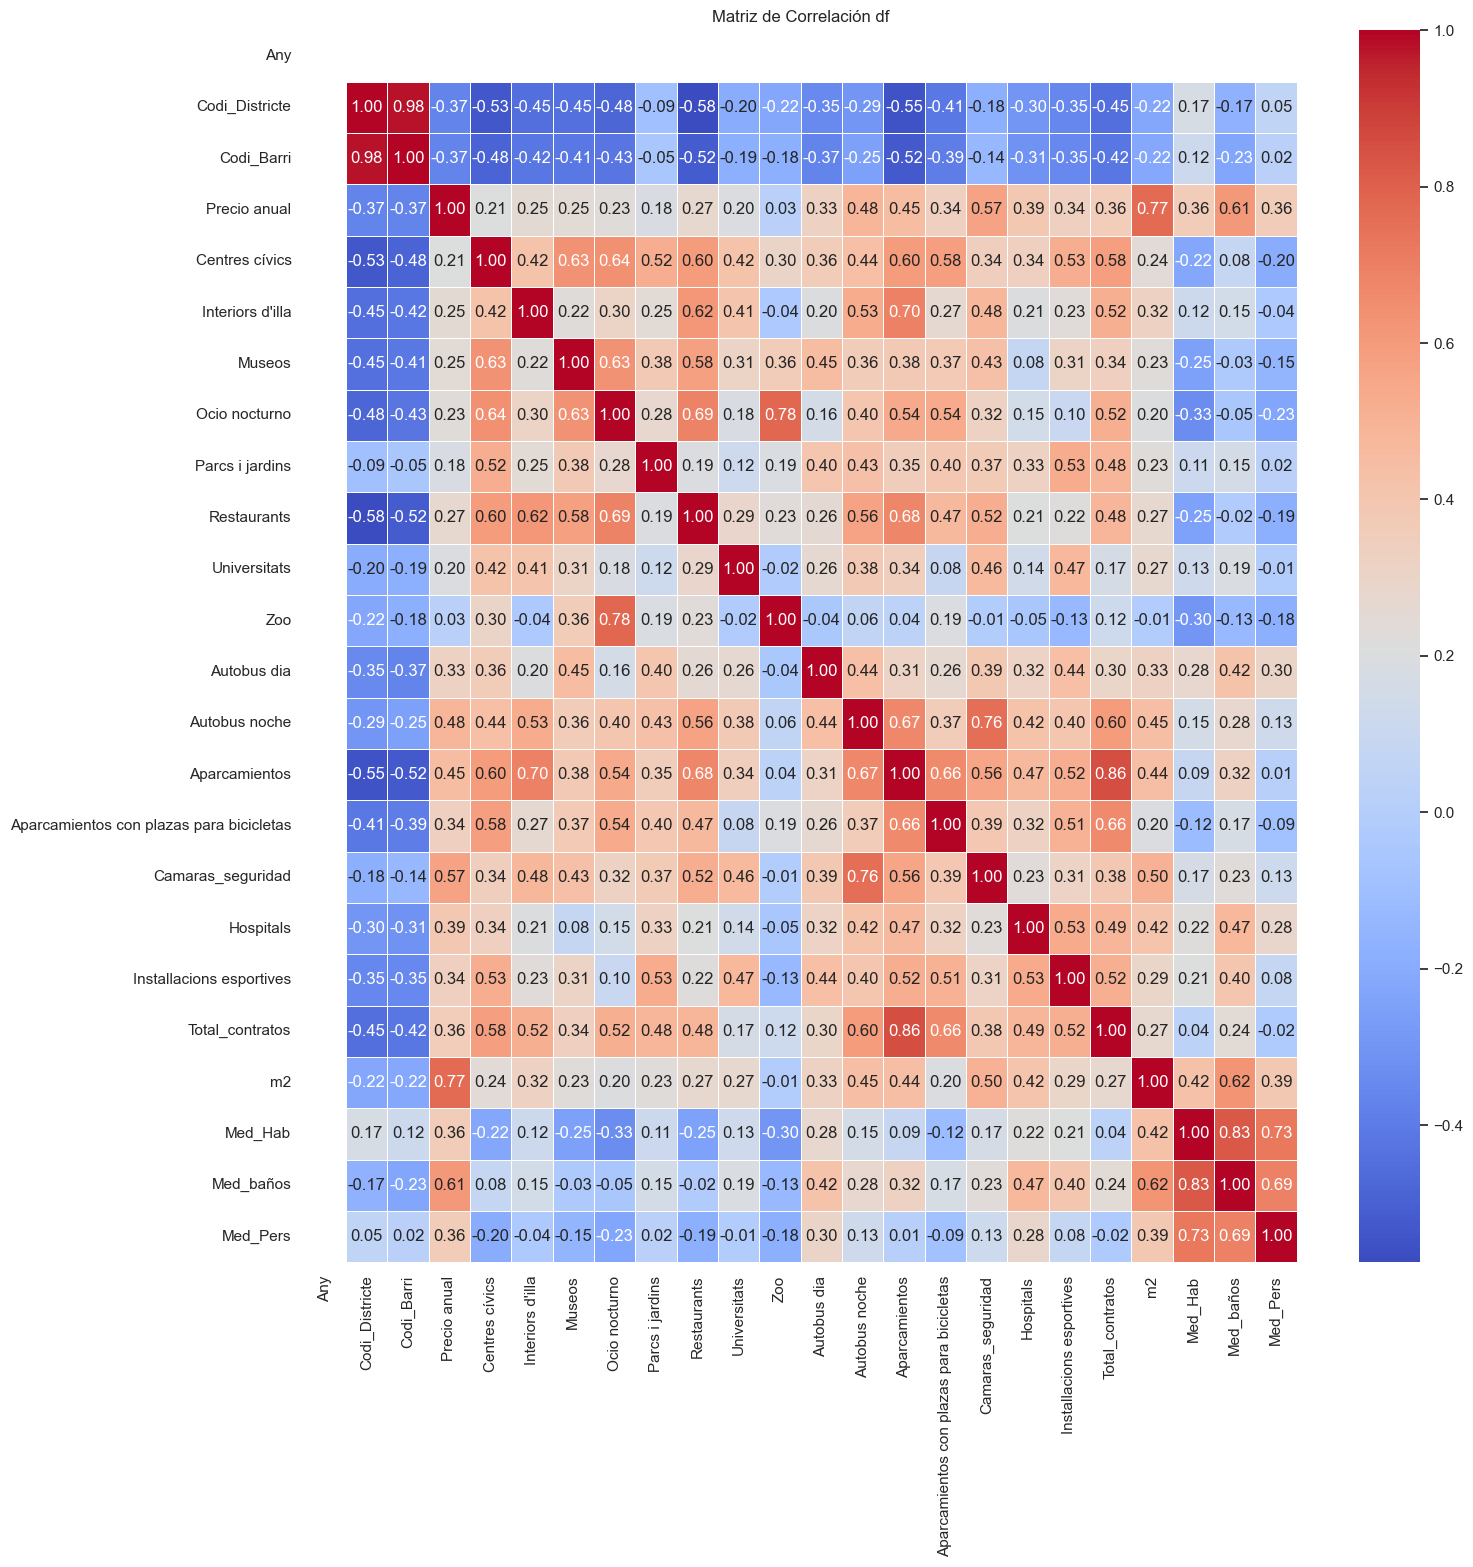

In [626]:
correlation_matrix = Alquiler_copy.corr()
sns.set(style="white")
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación df")
plt.savefig('Matriz de correlacion.png')
plt.show()

Hago un primer acercamiento a la correlación entre variables, para ello hago una matriz de correlación, en esta podemos ver que variables y en que porcentaje tienen una relación con nuestra variable target, 'Precio_anual', cada destacar que esta correlación es el resultado de hacer ingenieria de caracteristicas, aqui he unificado variables y explorado otras, por tanto el proceso cambio varias veces de enfoque, siempre en la busqueda de mejorar la correlacion de las variables con la variable target, por eso para mi esta matriz es la base de mi  proceso, pues aunque no es totalmente exacta, por que solo muestra las relaciones lineales de las variables, si que me permite tener una idea de como sera el comportamiento y la importancia de cada variable frente a mi variable objetivo. 

In [273]:
Alquiler_data['Transporte'] = Alquiler_data['Autobus dia'] + Alquiler_data['Autobus noche']
Alquiler_data.drop(['Autobus dia', 'Autobus noche'], axis=1, inplace=True)

In [274]:
Alquiler_data['Aparcamientos'] = Alquiler_data['Aparcamientos'] + Alquiler_data['Aparcamientos con plazas para bicicletas']
Alquiler_data.drop(['Aparcamientos', 'Aparcamientos con plazas para bicicletas'], axis=1, inplace=True)

In [275]:
Alquiler_data['Areas verdes'] = Alquiler_data["Interiors d'illa"] + Alquiler_data['Parcs i jardins'] 
Alquiler_data.drop(["Interiors d'illa", 'Parcs i jardins'], axis=1, inplace=True)

In [276]:
Alquiler_data['Equip social'] = Alquiler_data['Centres cívics'] + Alquiler_data['Universitats'] + Alquiler_data['Installacions esportives'] + Alquiler_data['Hospitals'] 
Alquiler_data.drop(['Centres cívics', 'Universitats', 'Installacions esportives', 'Hospitals' ], axis=1, inplace=True)

In [277]:
Alquiler_data['Equip ocio'] = Alquiler_data['Museos'] + Alquiler_data['Ocio nocturno'] + Alquiler_data['Restaurants'] + Alquiler_data['Zoo']
Alquiler_data.drop(['Museos', 'Ocio nocturno', 'Restaurants', 'Zoo' ], axis=1, inplace=True)

En esta ingenieria de caracteristicas, explorando como mejorar correlacion de variables para que mi modelo sea mas robusto en cuento a datos, decido unificar variables que a mi concepto son semejantes. mi objetivo siempre es que se mejoren las correlaciones y asi la infliencia de estas en mi variable target.

In [530]:
Alquiler_data

Any  Codi_Districte Nom_Districte  Codi_Barri  \
0   2023               1  Ciutat Vella           1   
1   2023               1  Ciutat Vella           2   
2   2023               1  Ciutat Vella           3   
3   2023               1  Ciutat Vella           4   
4   2023               2      Eixample           5   
..   ...             ...           ...         ...   
68  2023              10    Sant Martí          69   
69  2023              10    Sant Martí          70   
70  2023              10    Sant Martí          71   
71  2023              10    Sant Martí          72   
72  2023              10    Sant Martí          73   

                                       Nom_Barri  \
0                                       el Raval   
1                                 el Barri Gòtic   
2                                 la Barceloneta   
3          Sant Pere, Santa Caterina i la Ribera   
4                                  el Fort Pienc   
..                                           ...   
68  Diagonal Mar i el Front Marítim del Poblenou   
69                         el Besòs i el Maresme   
70                       Provençals del Poblenou   
71                      Sant Martí de Provençals   
72                           la Verneda i la Pau   

                        Lloguer_mitja  Precio anual  Camaras_seguridad  \
0   Lloguer mitjà mensual (Euros/mes)        926.10                2.0   
1   Lloguer mitjà mensual (Euros/mes)       1286.70                3.0   
2   Lloguer mitjà mensual (Euros/mes)        990.45                4.0   
3   Lloguer mitjà mensual (Euros/mes)       1086.65                2.0   
4   Lloguer mitjà mensual (Euros/mes)       1170.60                3.0   
..                                ...           ...                ...   
68  Lloguer mitjà mensual (Euros/mes)       1444.35               10.0   
69  Lloguer mitjà mensual (Euros/mes)        777.25                3.0   
70  Lloguer mitjà mensual (Euros/mes)       1187.35                5.0   
71  Lloguer mitjà mensual (Euros/mes)        943.10                1.0   
72  Lloguer mitjà mensual (Euros/mes)       1069.75                0.0   

    Total_contratos     m2  Med_Hab  Med_baños  Med_Pers  Transporte  \
0              1322  64.35      3.9        1.2       2.3          43   
1               724  81.95      3.9        1.2       2.3          38   
2               274  58.85      3.9        1.2       2.3          48   
3              1024  69.70      3.9        1.2       2.3          41   
4               802  77.80      4.8        1.6       2.4          39   
..              ...    ...      ...        ...       ...         ...   
68              256  82.65      4.7        1.4       2.4          44   
69              394  65.65      4.7        1.4       2.4          42   
70              352  74.25      4.7        1.4       2.4          43   
71              404  73.95      4.7        1.4       2.4          23   
72              926  66.05      4.7        1.4       2.4          37   

    Areas verdes  Equip social  Equip ocio  
0             26         108.0          68  
1             14          68.0          65  
2             10         115.0          27  
3             38          29.0         190  
4             34         133.0           9  
..           ...           ...         ...  
68            31          43.0           0  
69            42          41.0           2  
70            26          19.0           2  
71            27          81.0           0  
72            46          72.0           0  

[73 rows x 17 columns]

In [279]:
Alquiler_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Any                73 non-null     int64  
 1   Codi_Districte     73 non-null     int64  
 2   Nom_Districte      73 non-null     object 
 3   Codi_Barri         73 non-null     int64  
 4   Nom_Barri          73 non-null     object 
 5   Lloguer_mitja      73 non-null     object 
 6   Precio anual       73 non-null     float64
 7   Camaras_seguridad  73 non-null     float64
 8   Total_contratos    73 non-null     int64  
 9   m2                 73 non-null     float64
 10  Med_Hab            73 non-null     float64
 11  Med_baños          73 non-null     float64
 12  Med_Pers           73 non-null     float64
 13  Transporte         73 non-null     int64  
 14  Areas verdes       73 non-null     int64  
 15  Equip social       73 non-null     float64
 16  Equip ocio         73 non-nu

Resultado de nuestra ingenieria de caracteristicas, tenemos ahora 17 columnas, algunas de referencia de año y barrio y otras numericas. 

1. Titulo: Barcelona Datos de Alquiler

2. Fuentes:
   (a) Origen:  Todos los datos fueron extraidos de la pagina oficial del gobierno de Cataluña "OPEN DATA". Este dataset es una recopilacion de diferentes datasets, que fueron procesados y unificados un solo dataset.
   (b) Creador:  Reinel Mendez Reina 
   (c) Fecha: 18 Marzo, 2024

3. Past Usage:
   

4. Información Relevante:

   En que barrio es mejor vivir dependiendo de las necesidades de cada persona.

5. Numero de registros: 73

6. Numero de variables: 28 Variables.

7. Información de Variables:

 0   Any: 2023
 
 1   Codi_Districte: Codigo que se le asigna desde el ayuntamiento a cada distrito 
 
 2   Nom_Districte:  Nombre del distrito 
 
 3   Codi_Barri: Codigo que se le asigna desde el ayuntamiento a cada barrio    
 
 4   Nom_Barri: nombre del barrio    
 
 5   Lloguer_mitja: Descripción  
 
 6   Precio anual: Precio promedio del alquiler por barrios de Barcelona 
 
 7   Camaras_seguridad: Camaras de seguridad controladas por la policia local
 
 8   Total_contratos: Promedio de contratos por barrio en Barcelona
 
 9   m2: Promedio de m2 para viviendas de alquiler en Barcelona
 
 10  Med_Hab: Promedio de habitaciones por vivienda de alquiler en Barcelona
 
 11  Med_baños: Promedio de baños por viviendas de alquiler en Barcelona
 
 12  Med_Pers: Promedio de personas que vivien en las viviendas de alquiler en Barcelona
 
 13  Transporte: Transporte publico ( estaciones de bus dia, nocturno, estaciones de bus)
 
 14  Areas verdes: Parques, jardines, zonas de juego y  interiores de manzana
 
 15  Equip social: zonas wifi, centros civicos, universidades, instalaciones deportivas, hospitales, CAPS, CUAPS
 
 16  Equip ocio: Restaurantes, ocio nocturno,Museos, zoologicos        

8. Valores de variables faltantes:  None.

In [280]:
Alquiler_data.Any.unique()

array([2023], dtype=int64)

In [281]:
Alquiler_data.Codi_Districte.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [282]:
Alquiler_data.Nom_Districte.unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

In [283]:
Alquiler_data.Codi_Barri.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73], dtype=int64)

In [284]:
Alquiler_data.Nom_Barri.unique()

array(['el Raval', 'el Barri Gòtic', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Fort Pienc',
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble Sec',
       'la Marina del Prat Vermell', 'la Marina de Port',
       'la Font de la Guatlla', 'Hostafrancs', 'la Bordeta',
       'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova",
       'el Baix Guinardó', 'Can Baró', 'el Guinardó',
       "la Font d'en Fargues", 'el Carmel', 'la Teixonera',
       'Sant Genís dels Agudells', 'Montbau', "la Vall d'Hebron",
       'la Clota', '

In [285]:
Alquiler_data.duplicated().sum()

0

### ANALISIS ESTADISTICO 

In [286]:
Alquiler_data.describe().round(0)

Any  Codi_Districte  Codi_Barri  Precio anual  Camaras_seguridad  \
count    73.0            73.0        73.0          73.0               73.0   
mean   2023.0             6.0        37.0        1024.0                2.0   
std       0.0             3.0        21.0         273.0                3.0   
min    2023.0             1.0         1.0         492.0                0.0   
25%    2023.0             4.0        19.0         857.0                0.0   
50%    2023.0             7.0        37.0         951.0                2.0   
75%    2023.0             8.0        55.0        1132.0                3.0   
max    2023.0            10.0        73.0        1815.0               16.0   

       Total_contratos     m2  Med_Hab  Med_baños  Med_Pers  Transporte  \
count             73.0   73.0     73.0       73.0      73.0        73.0   
mean             548.0   71.0      5.0        1.0       2.0        44.0   
std              466.0   11.0      0.0        0.0       0.0        28.0   
min                2.0   51.0      4.0        1.0       2.0         4.0   
25%              188.0   64.0      4.0        1.0       2.0        24.0   
50%              414.0   69.0      5.0        2.0       2.0        37.0   
75%              868.0   75.0      5.0        2.0       2.0        57.0   
max             2042.0  112.0      5.0        2.0       3.0       135.0   

       Areas verdes  Equip social  Equip ocio  
count          73.0          73.0        73.0  
mean           20.0          59.0        11.0  
std            12.0          50.0        29.0  
min             1.0           2.0         0.0  
25%            10.0          25.0         0.0  
50%            19.0          43.0         1.0  
75%            27.0          79.0         7.0  
max            53.0         283.0       190.0

Analisis estadistico Inicial. 

- Any: 
- Codi_Districte: 
- Nom_Districte: 
- Codi_Barri: 
- Nom_Barri:
- Lloguer_mitja: 

- Precio anual: Alquiler medio mensual (Euros/mes) es de 1.024 Euros para la ciudad de Barcelona. entre los datos hay una desviacion estandar de 273 Euros. el precio minimo de alquiler es de 492 euros. en el 25% de los datos se contabiliza que la media es de 857 euros. En el 50% de los barrios el precio medio de alquileres es de  951 Euros. En el 75% de los barrios el precio medio es de 1132  Euros. En el total de los barrios el precio medio es de 1815 Euros. entonces vemos que el 50% de los barrios tienen un precio medio de alquiler menos a 951 Euros y el otro 50% mayor a 952. El 25% de los barrios tienen una media de alquiler mayor a 1132 Euros y solo un 25% de los barrios tienen una precio medio de alquiler inferior a 857 Euros. 

- Camaras_seguridad:  El barrio que mas Camaras_seguridad tiene: 16, el que menos Camaras_seguridad tiene: 0. hay barrios sin camaras de seguridad. 

- Total_contratos: El maximo en nuestro dataset de contratos es 2.042 contratos para un barrio, el minimo es 2 contratos para un barrio, una desviacion estandar de 466, y una media de 548. 

- M2: El minimo de m2 para un barrio es de 51 y el maximo es de 112 m2, una media de 71 m2 por barrio y una desviacion estandar de 11 m2. 

- Med_Hab: El promedio de habitaciones por distrito es de 4 habitaciones en pisos de alquiler, minimo 4 habitaciones, maximo 5 habitaciones.

- Med_baños: El promedio de baños por distrito es de 1 baño en pisos de alquiler, minimo 1 baño, maximo 2 baños.

- Med_Pers: El promedio de personas en pisos de alquiler en Barcelona es de 2 personas, el minimo es de 2 personas y el maximo es de 3.

- Transporte: En promedio por barrio en Barcelona hay 44 ya sea estaciones de bus dia, nocturno o estaciones de bus, solo relacionado a bus. minimo 4 estaciones tiene un barrio maximo 135. algunos tienen una oferta variada y buena conectividad y servicio. 

- Areas verdes: En promedio los barrios de barcelona tienen 20 areas verdes, un minimo de 12 por barrio y un maximo de 53 areas verdes. tambien hay barrios con mayor numero de areas verder que otros. 

- Equip social: En promedio los barrios de Barcelona, tienen 59 equipamientos sociales, el barrio con menos equipamientos social tiene 2 y el que mas tiene, cuenta con 283 equipamientos sociales, vemos un margen bastante amplio entre los que tienen y los que no. 

- Equip ocio: En promedio los barrios de Barcelona, tienen 11 equipamientos de ocio, el barrio con menos equipamientos social tiene 0 y el que mas tiene, cuenta con 190 equipamientos de ocio, vemos un margen bastante amplio entre los que tienen y los que no. hay barrio(s) que no tiene este tipo de equipamientos. 

In [531]:
Alquiler_data.sum()

Any                                                             147679
Codi_Districte                                                     456
Nom_Districte        Ciutat VellaCiutat VellaCiutat VellaCiutat Vel...
Codi_Barri                                                        2701
Nom_Barri            el Ravalel Barri Gòticla BarcelonetaSant Pere,...
Lloguer_mitja        Lloguer mitjà mensual (Euros/mes)Lloguer mitjà...
Precio anual                                                  74779.68
Camaras_seguridad                                                165.0
Total_contratos                                                  40008
m2                                                              5162.4
Med_Hab                                                          340.3
Med_baños                                                        107.2
Med_Pers                                                         175.5
Transporte                                                        3226
Areas 

Si vemos el total para Barcelona de cada variable vemos datos totales interesantes como: 
Any
Codi_Districte
Nom_Districte
Codi_Barri 
Nom_Barri
Lloguer_mitja 
Precio anual
Camaras_seguridad:  165 en total en Barcelona, como son datos del ayuntamiento podriamos suponer que son camaras instaladas y controladas por el ayuntamiento y controladas por la policia.
Total_contratos: 40008 en total para el año 2023.
m2: 
Med_Hab
Med_baños
Med_Pers
Transporte: 3226 total de estaciones de bus de diay  noche y estaciones de bus. 
Areas verdes: 1447 en total, para todo Barcleona, es poco para el tipo de ciudad. 
Equip social: 4329 registrados en mi conjunto de datos
Equip ocio:  registrados en mi conjunto de datos

Es importante destacar por ejemplo para: La mayoria de las variables, estan en constante cambio en la ciudad y en este conjunto de datos tal vez no este el registro completo y la realidad de estas variables actualmente. aunque sean datos oficiales del ayuntamiento. 

In [288]:
df = Alquiler_data.loc[:, ['Codi_Barri', 'Precio anual',  'Camaras_seguridad', 'Total_contratos', 'm2', 'Med_Hab', 'Med_baños', 'Med_Pers', 'Transporte', 'Areas verdes', 'Equip social', 'Equip ocio' ]]
df

Codi_Barri  Precio anual  Camaras_seguridad  Total_contratos     m2  \
0            1        926.10                2.0             1322  64.35   
1            2       1286.70                3.0              724  81.95   
2            3        990.45                4.0              274  58.85   
3            4       1086.65                2.0             1024  69.70   
4            5       1170.60                3.0              802  77.80   
..         ...           ...                ...              ...    ...   
68          69       1444.35               10.0              256  82.65   
69          70        777.25                3.0              394  65.65   
70          71       1187.35                5.0              352  74.25   
71          72        943.10                1.0              404  73.95   
72          73       1069.75                0.0              926  66.05   

    Med_Hab  Med_baños  Med_Pers  Transporte  Areas verdes  Equip social  \
0       3.9        1.2       2.3          43            26         108.0   
1       3.9        1.2       2.3          38            14          68.0   
2       3.9        1.2       2.3          48            10         115.0   
3       3.9        1.2       2.3          41            38          29.0   
4       4.8        1.6       2.4          39            34         133.0   
..      ...        ...       ...         ...           ...           ...   
68      4.7        1.4       2.4          44            31          43.0   
69      4.7        1.4       2.4          42            42          41.0   
70      4.7        1.4       2.4          43            26          19.0   
71      4.7        1.4       2.4          23            27          81.0   
72      4.7        1.4       2.4          37            46          72.0   

    Equip ocio  
0           68  
1           65  
2           27  
3          190  
4            9  
..         ...  
68           0  
69           2  
70           2  
71           0  
72           0  

[73 rows x 12 columns]

Este df solo contienen las variables numericad y la columna de referencia numerica por barrio 'Codi_Barri'

In [289]:
df['Camaras_seguridad'] = df['Camaras_seguridad'].astype(int)
df['Equip social'] = df['Equip social'].astype(int)


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Codi_Barri         73 non-null     int64  
 1   Precio anual       73 non-null     float64
 2   Camaras_seguridad  73 non-null     int32  
 3   Total_contratos    73 non-null     int64  
 4   m2                 73 non-null     float64
 5   Med_Hab            73 non-null     float64
 6   Med_baños          73 non-null     float64
 7   Med_Pers           73 non-null     float64
 8   Transporte         73 non-null     int64  
 9   Areas verdes       73 non-null     int64  
 10  Equip social       73 non-null     int32  
 11  Equip ocio         73 non-null     int64  
dtypes: float64(5), int32(2), int64(5)
memory usage: 6.8 KB


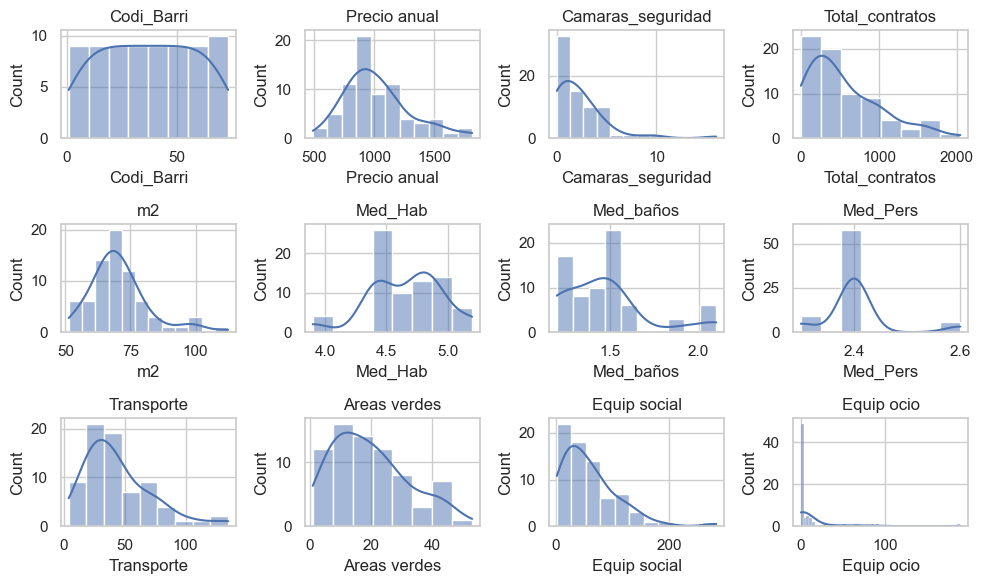

In [291]:
sns.set(style="whitegrid")

# Calcular el número de filas y columnas necesarias para acomodar todos los subgráficos
num_columnas = 4
num_filas = (len(df.columns) - 1) // num_columnas + 1

# Crear la figura y los subgráficos
plt.figure(figsize=(10, 6))
for i, column in enumerate(df.columns):
    plt.subplot(num_filas, num_columnas, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.tight_layout()
plt.savefig('Histograma de variables.png')
plt.show()

En estos histogramas podemos observar para cada variable:
    
- Codi_Barri: 

- Precio anual: La distribución de los datos de esta variable parece normal, asemeja a una campana de gauss, aunque con algunas variaciones.

- Camaras_seguridad:  La distribución de los datos parece sesgada y con datos extremos, no parece una campana, la mayoria de los datos agrupados en unos pocos rangos.

- Total_contratos: La distribucion de los datos no es normal, no parece una camapan de gauss y la mayoria de datos esta en los rangos mas bajos. 

- M2: La distribucion de los datos parece que fuera normal, por su similitusd a la campana de Gauss, sin embargo tiene algunas variaciones.

- Med_Hab: La distribucion de los datos no parece normal (no hay campaan de gauss) de hecho hay un rango intermedio con pocos datos lo que hace que se deforme la distribucion.

- Med_baños: La distribucion de datos no es normal, hay bastante variabilidad en los rangos.

- Med_Pers: La distribucion de los datos no parece una campana por tanto no parece ser normal.

- Transporte: La distribucion de los datos no es normal, aunque parece una distribucioón con tendencia a la normalidad sin embargo parece que hay datos extremos que deforman la camapana de Gauss

- Areas verdes: La distribucion de los datos no es normal, aunque parece una distribucioón con tendencia a la normalidad sin embargo parece que hay datos extremos que deforman la camapana de Gauss

- Equip social: La distribuciuon de los datos no es normal, parece que la mayor cantidad de datos se concentra en los primeros rangos y va disminuyendo poco a poco.

- Equip ocio: La distribucion de los datos no es normal, aunque parece una distribucioón con tendencia a la normalidad sin embargo parece que hay datos extremos que deforman la camapana de Gauss ademas parece que tiene datos muy extremos por que cantidad de rangos que contiene que son bastantes.

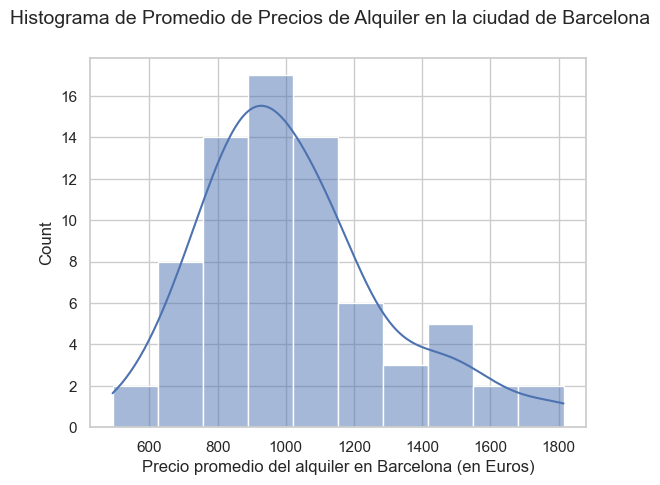

In [292]:
sns.histplot(df['Precio anual'], bins=10, kde=True)
plt.suptitle("Histograma de Promedio de Precios de Alquiler en la ciudad de Barcelona", size= 14)
plt.xlabel("Precio promedio del alquiler en Barcelona (en Euros)")
plt.savefig('Histograma de Promedio de Precios de Alquiler en la ciudad de Barcelona.png')
plt.show()

Este histograma nos muestra para la variable objetivo que los datos tieneden a tener una normalidad, camapana de Gauss sin embargo en rangos como 1500, parece que existe variaciones, ademas se ve que hay mas rangos hacia un costado del valor central por tanto no hay una distribucion normal, 17 barrios concentran su precio en el rango de 1000 euros, los menores rangos 600, 1600, 1800, contiene 2 barrios por rango.

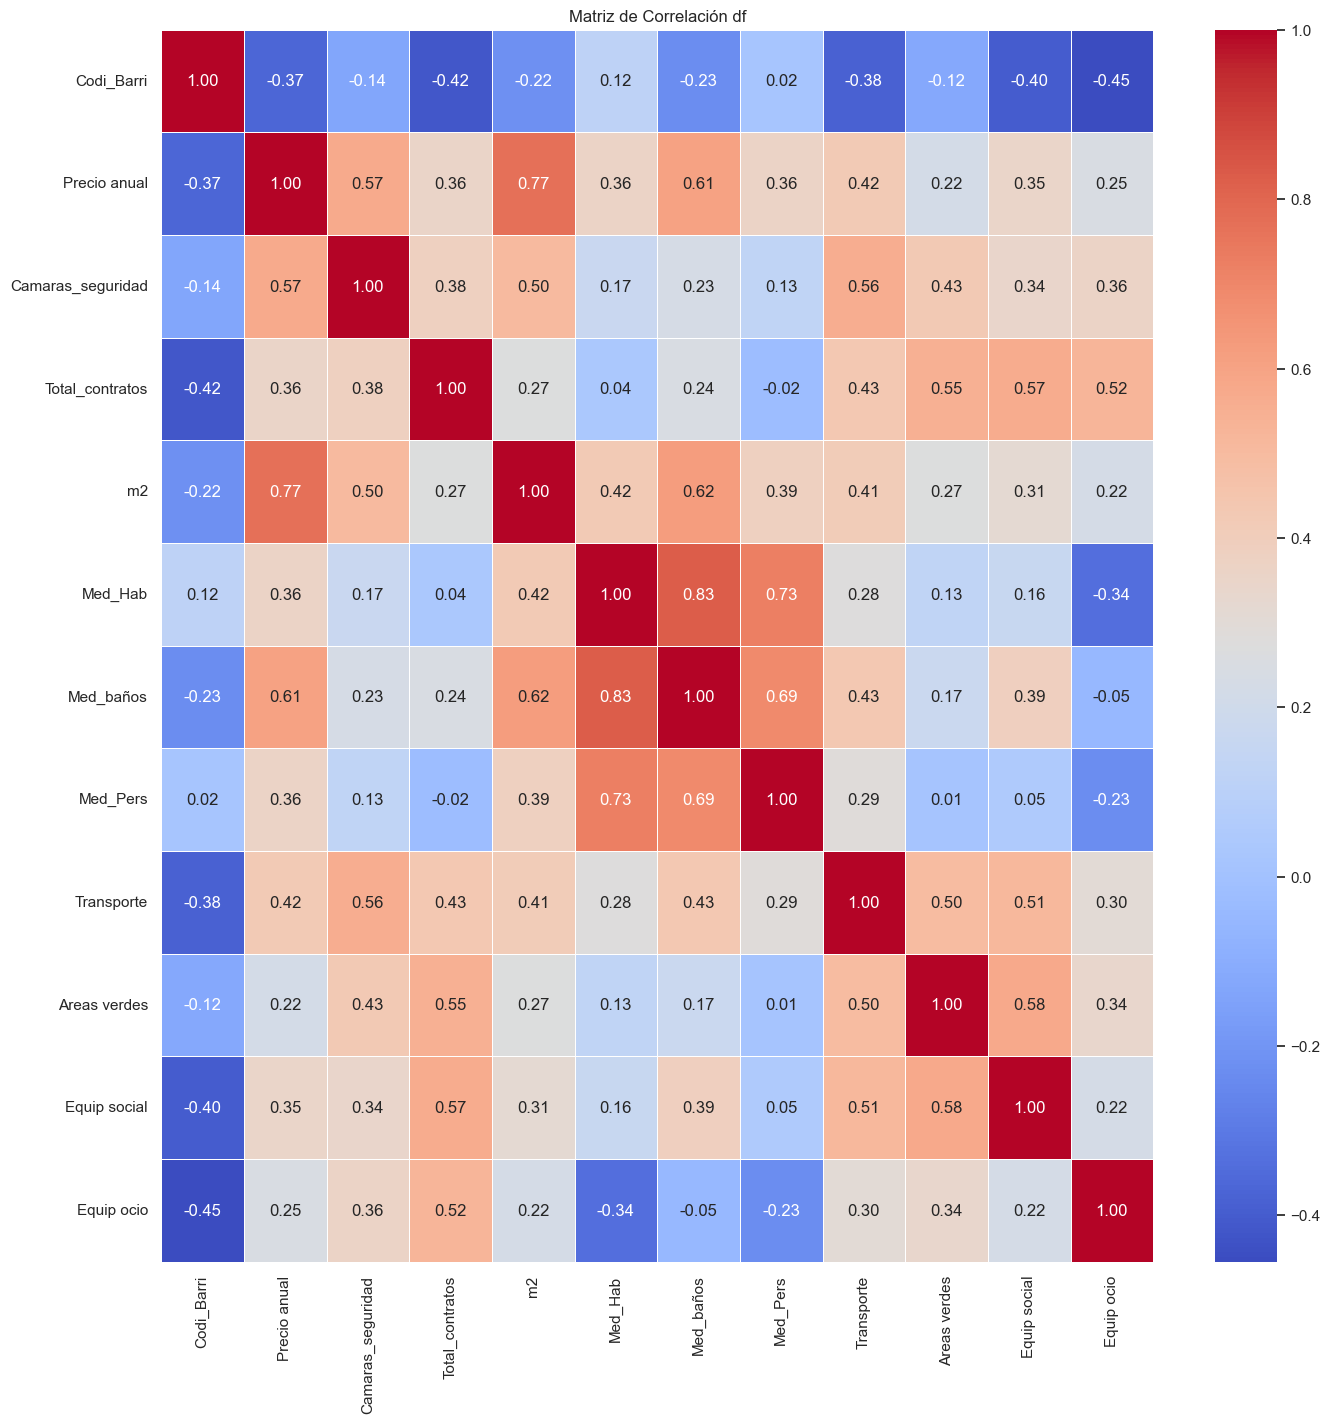

In [361]:
correlation_matrix = df.corr()
sns.set(style="white")
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación df")
plt.savefig('Matriz de correlacion2.png')
plt.show()

en esta matriz de correlacion, vemos como las variables se correlacionan entre ellas, para el estudio de mi caso me interesa saber sobre todo como se relacionan las variables ocn mi target, por ejemplo vemos que la variable que mas se correlaciona con mi variable target 'Precio_anual' es m2 con un 0.77, esto es una alta correlacion lineal, tambien Med_baños con 0.61. luego vemos camaras de seguridad 0.57, transporte con 0.42 y tambien es interesante ver que la variable que menos se correlaciona con la target es areas verdes. nos podria generar la pregunta de que tanto inlfuye tener areas verdes en el precio del alquiler, lo que se traduce en mejor calidad de vida? parece que no hay mucha correlacion, por tanto se podria decir que al no ser directamente e influenciar el precio de la vivienda de alquiler, podria ser mas equitativa en la ciudad. 

C:\Users\dpino\AppData\Local\Temp\ipykernel_23364\3728225255.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Precio anual', ci=None)


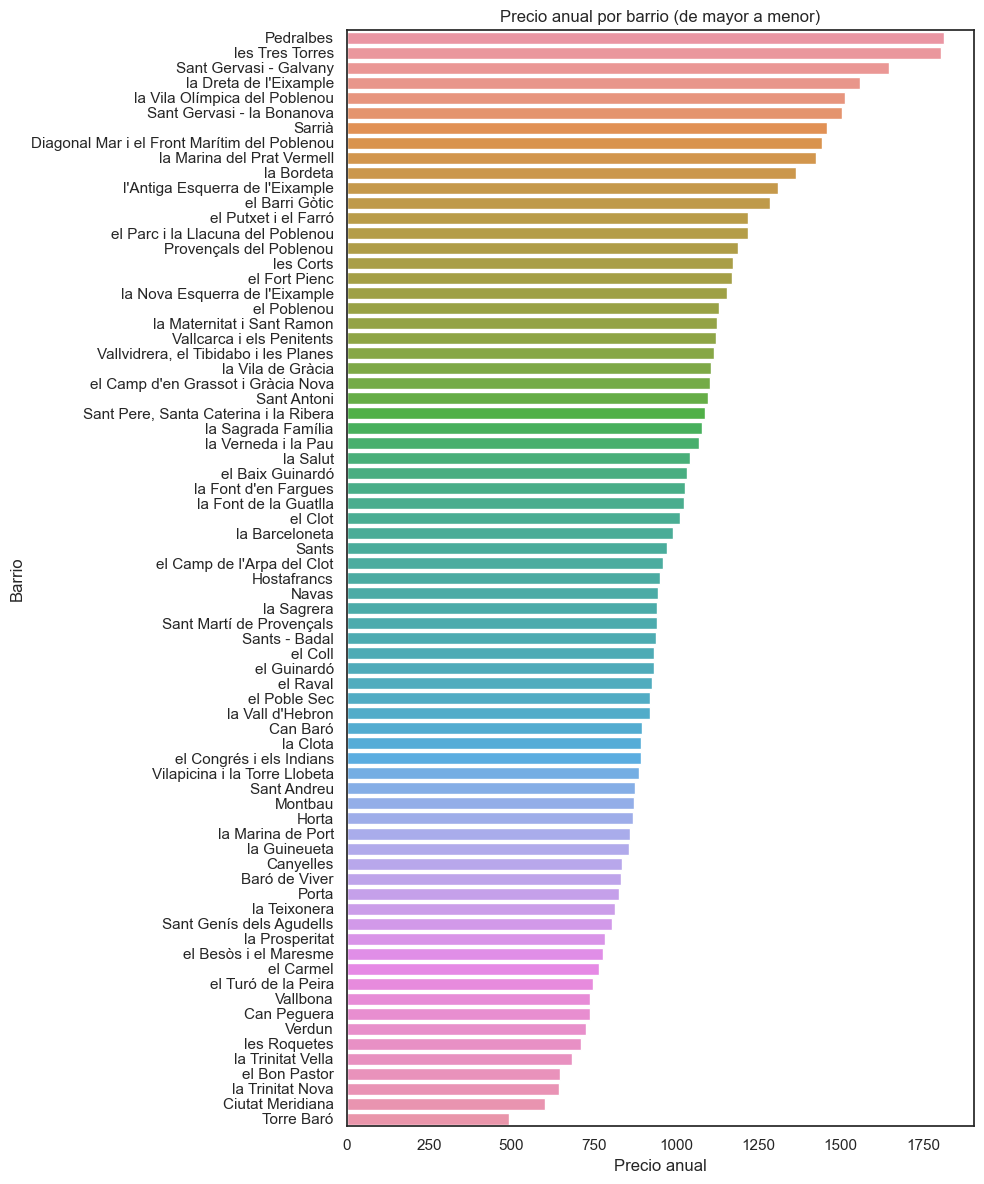

In [295]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Precio anual', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Precio anual', ci=None)

plt.title('Precio anual por barrio (de mayor a menor)')
plt.xlabel('Precio anual')
plt.ylabel('Barrio')
plt.tight_layout()
plt.savefig('Barras Precio anual.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_23364\97015258.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Camaras_seguridad', ci=None)


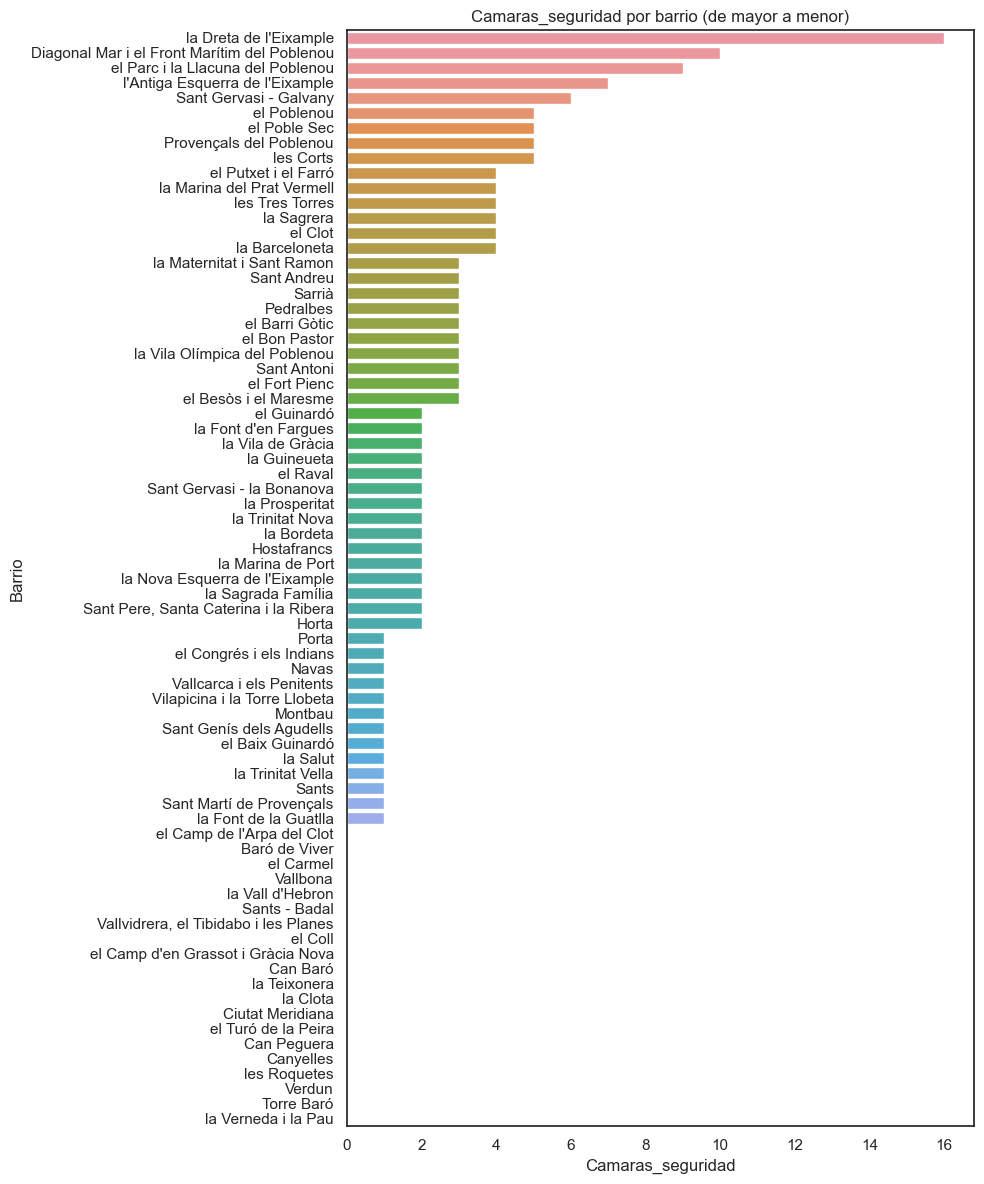

In [296]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Camaras_seguridad', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Camaras_seguridad', ci=None)

plt.title('Camaras_seguridad por barrio (de mayor a menor)')
plt.xlabel('Camaras_seguridad')
plt.ylabel('Barrio')
plt.tight_layout()
plt.savefig('Barras Camaras_seguridad.png')
plt.show()

Es importante destacar que las camaras de seguridad no estan relacionadas con el barrio donde vivas, tal vez exustan otras dinamicas como la afluencia de personas que este relacionada con cuentas camaras de seguridad hay en un barrio. 

C:\Users\dpino\AppData\Local\Temp\ipykernel_23364\3451802346.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Total_contratos', ci=None)


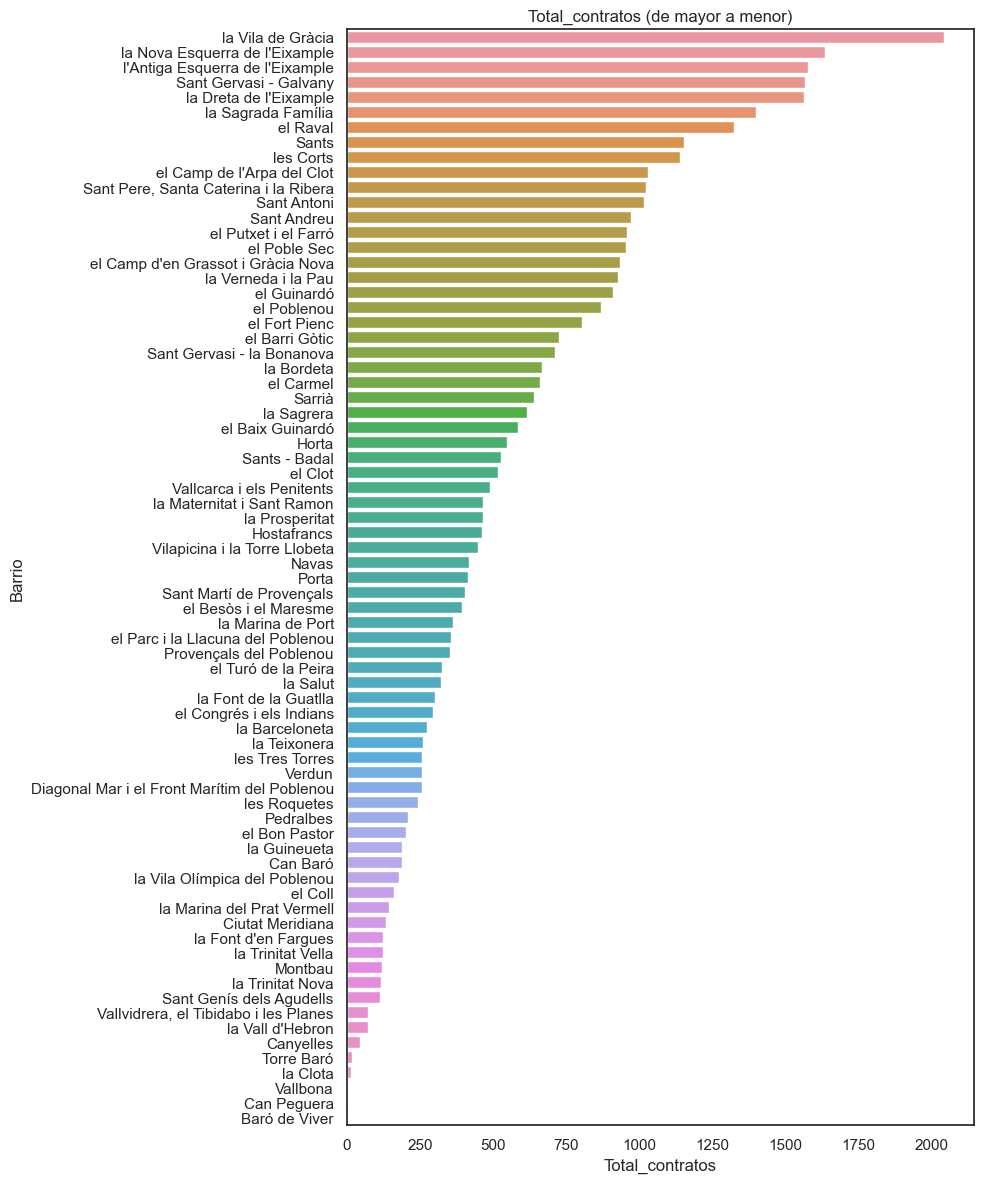

In [297]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Total_contratos', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Total_contratos', ci=None)

plt.title('Total_contratos (de mayor a menor)')
plt.xlabel('Total_contratos')
plt.ylabel('Barrio')
plt.tight_layout()
plt.savefig('Total_contratos.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_23364\165371460.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='m2', ci=None)


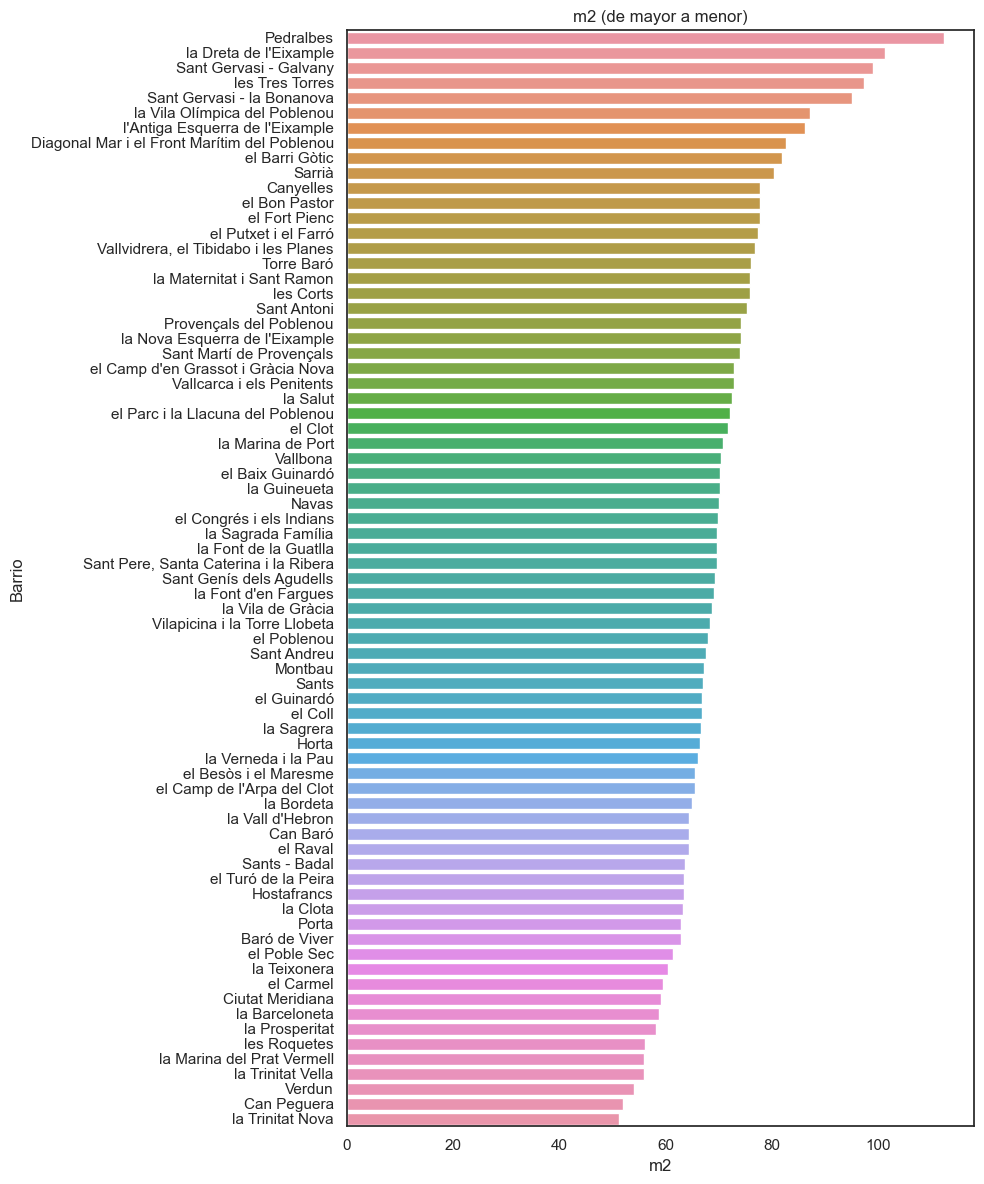

In [298]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='m2', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='m2', ci=None)

plt.title('m2 (de mayor a menor)')
plt.xlabel('m2')
plt.ylabel('Barrio')
plt.tight_layout()
plt.savefig('m2.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_23364\37598151.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Transporte', ci=None)


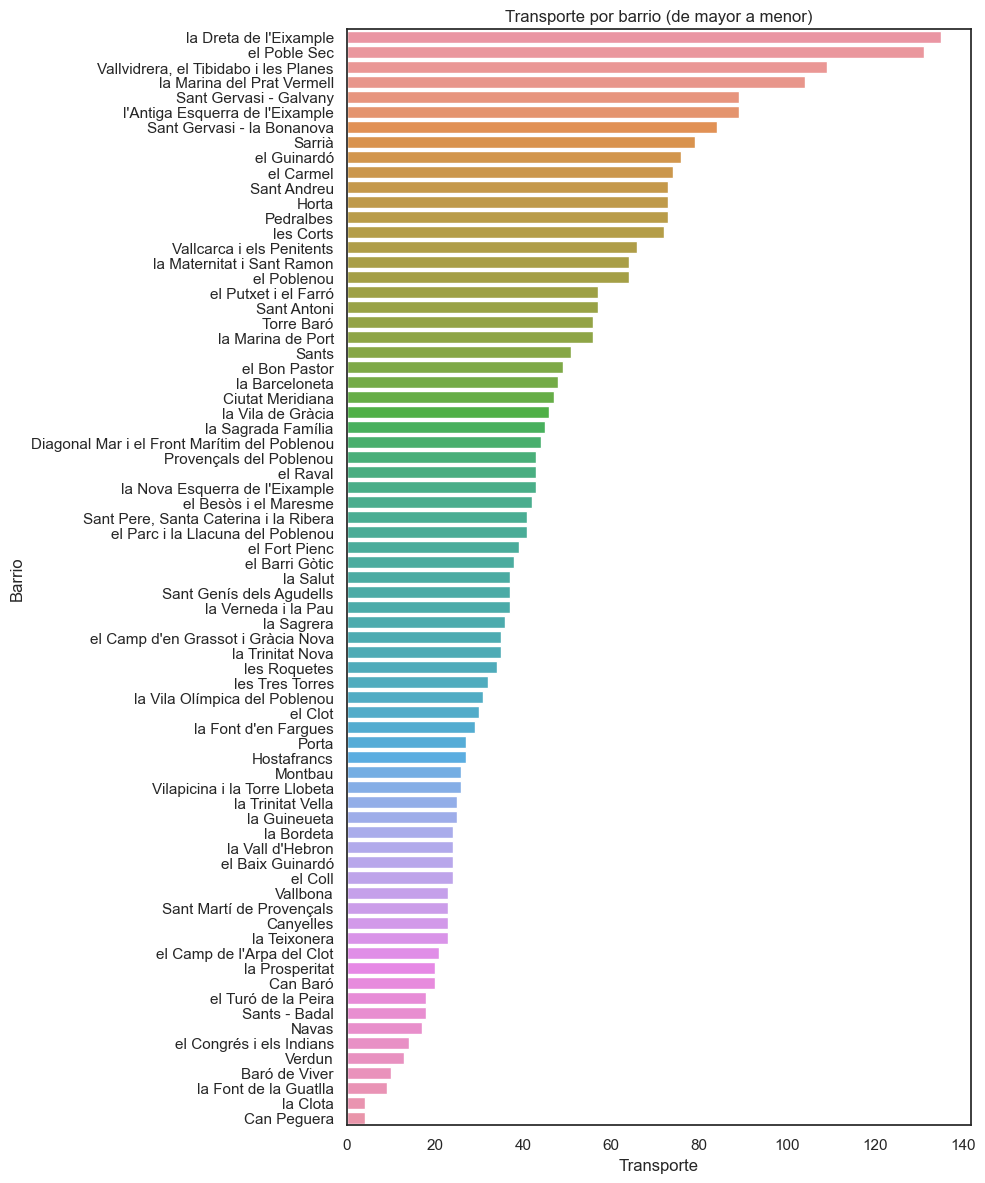

In [299]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Transporte', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Transporte', ci=None)

plt.title('Transporte por barrio (de mayor a menor)')
plt.xlabel('Transporte')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('Transporte.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_23364\3339069190.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x="Areas verdes", ci=None)


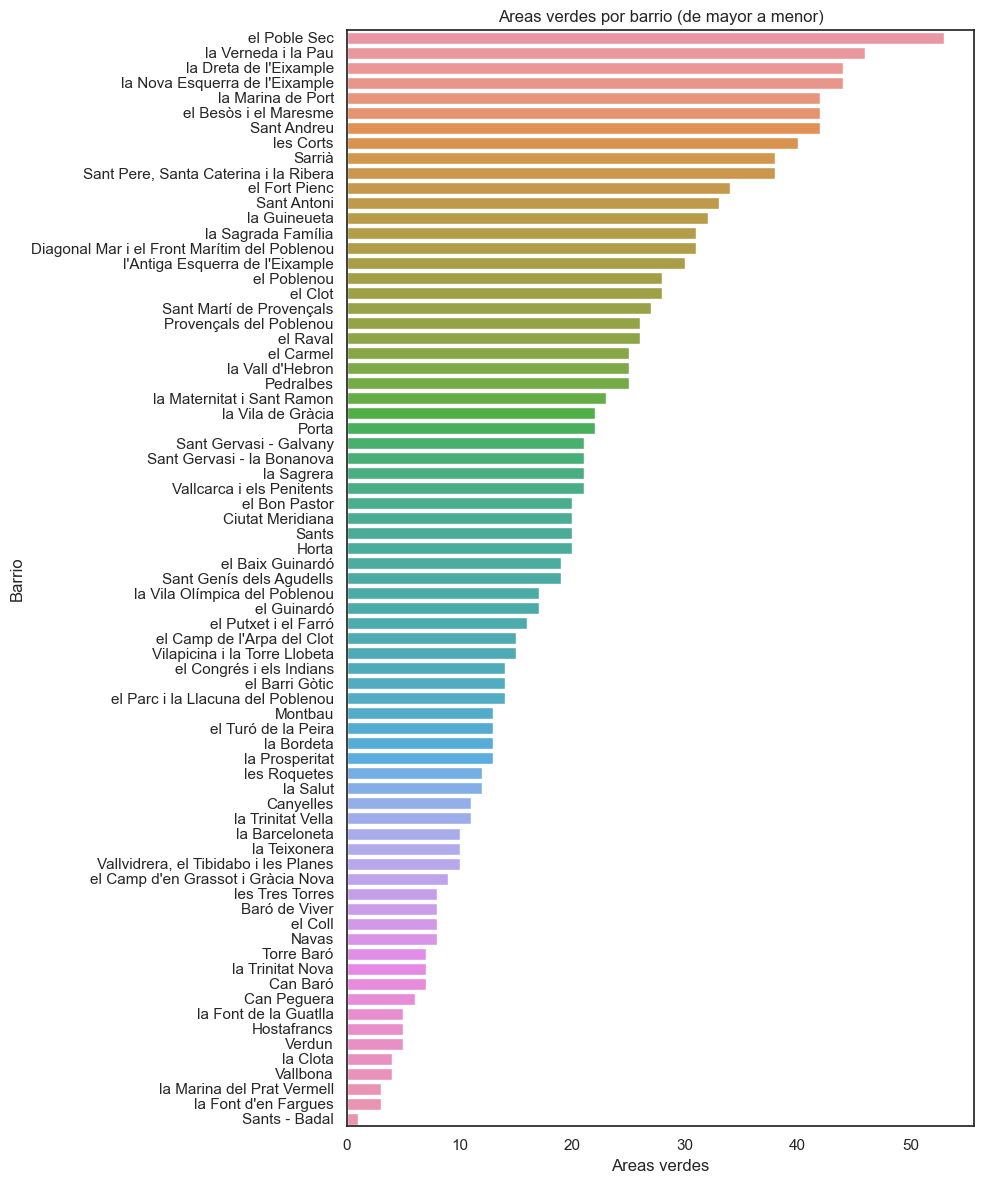

In [300]:
Alquiler_data_sorted = Alquiler_data.sort_values(by="Areas verdes", ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x="Areas verdes", ci=None)

plt.title("Areas verdes por barrio (de mayor a menor)")
plt.xlabel("Areas verdes")
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('Areas verdes.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_23364\1989339694.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x="Equip social", ci=None)


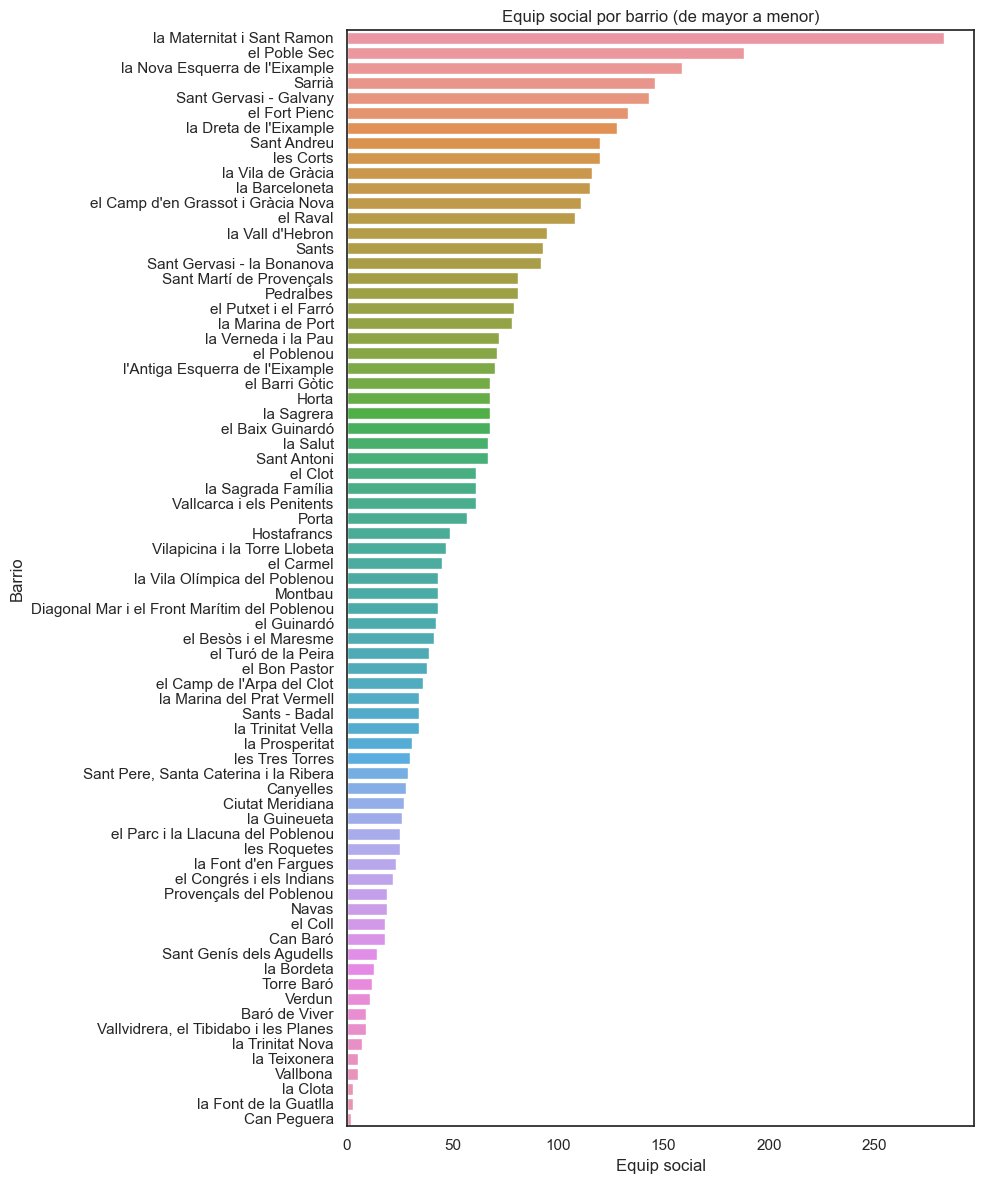

In [301]:
Alquiler_data_sorted = Alquiler_data.sort_values(by="Equip social", ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x="Equip social", ci=None)

plt.title("Equip social por barrio (de mayor a menor)")
plt.xlabel("Equip social")
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('Equip social.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_23364\3515850368.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Equip ocio', ci=None)


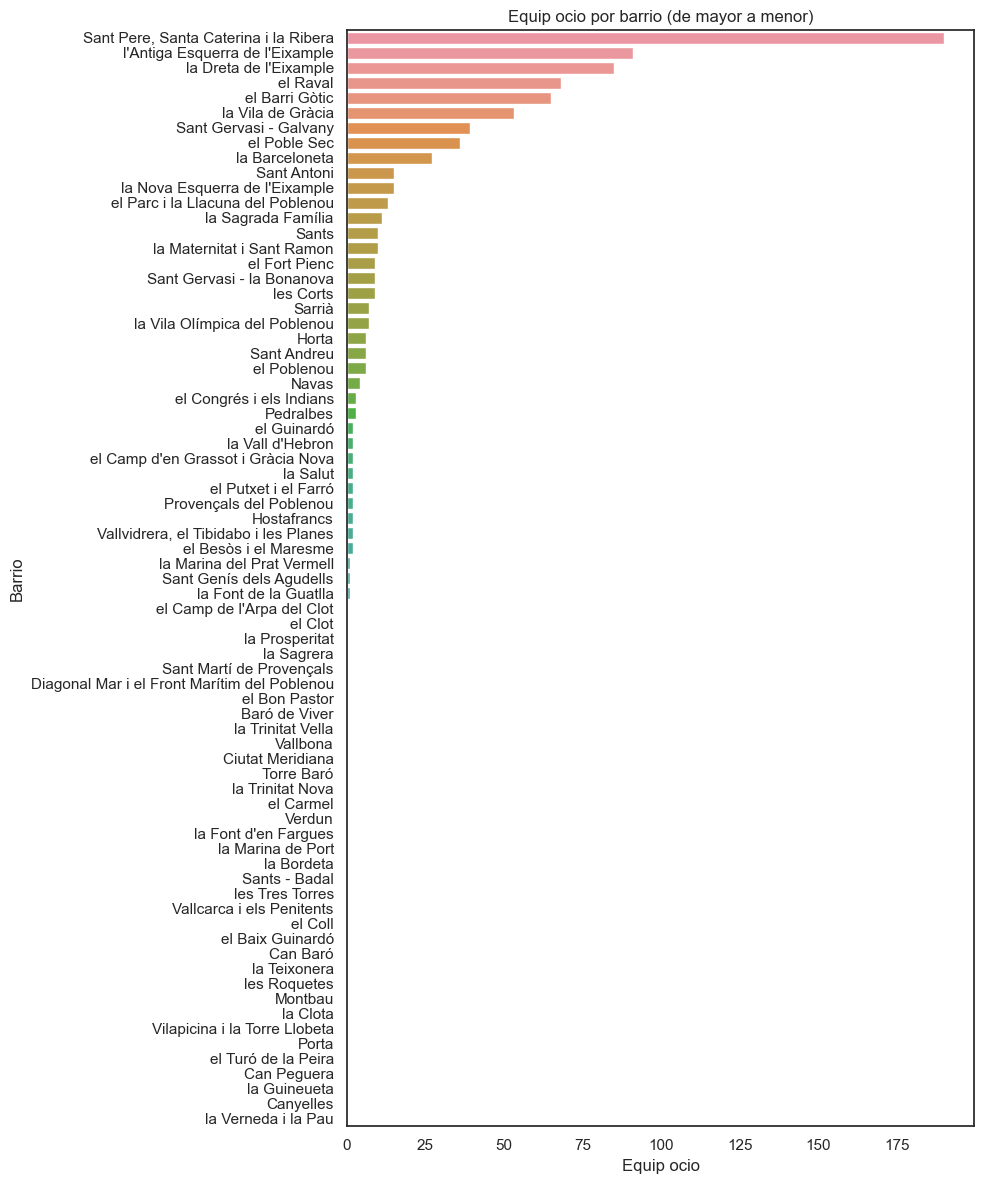

In [302]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Equip ocio', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Equip ocio', ci=None)

plt.title('Equip ocio por barrio (de mayor a menor)')
plt.xlabel('Equip ocio')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('Equip ocio.png')
plt.show()

esta variable podria ser la mas desactualizada de todas, vemos que cada dia se abrne y cierran restaurantes, locales, coctelerias, ocio nocturno, por tanto el dataset puede que no sea exacto y no concuerrde con la realidad. sin embargo si que concuerda con las dinamicas de los barrios, por ejemplo el barri ocon mas ocio es sant pere, eixample que todos sabemos se mueve el turismo por tanto podria ser mas facil encontrar este tipo de equipamientos.

C:\Users\dpino\AppData\Local\Temp\ipykernel_23364\1149743062.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Med_Hab', ci=None)


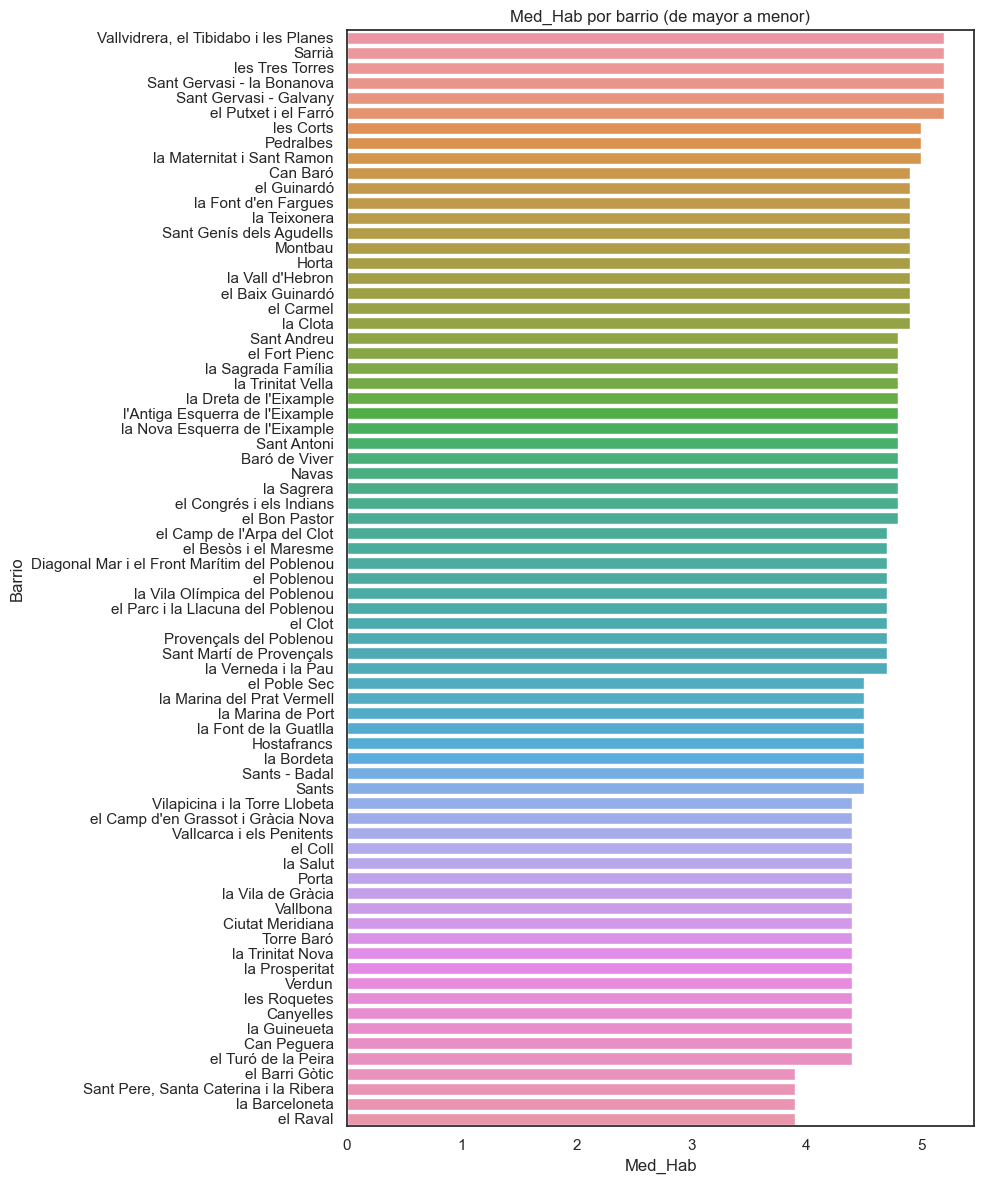

In [303]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Med_Hab', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Med_Hab', ci=None)

plt.title('Med_Hab por barrio (de mayor a menor)')
plt.xlabel('Med_Hab')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('Med_Hab.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_23364\1695120478.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Med_baños', ci=None)


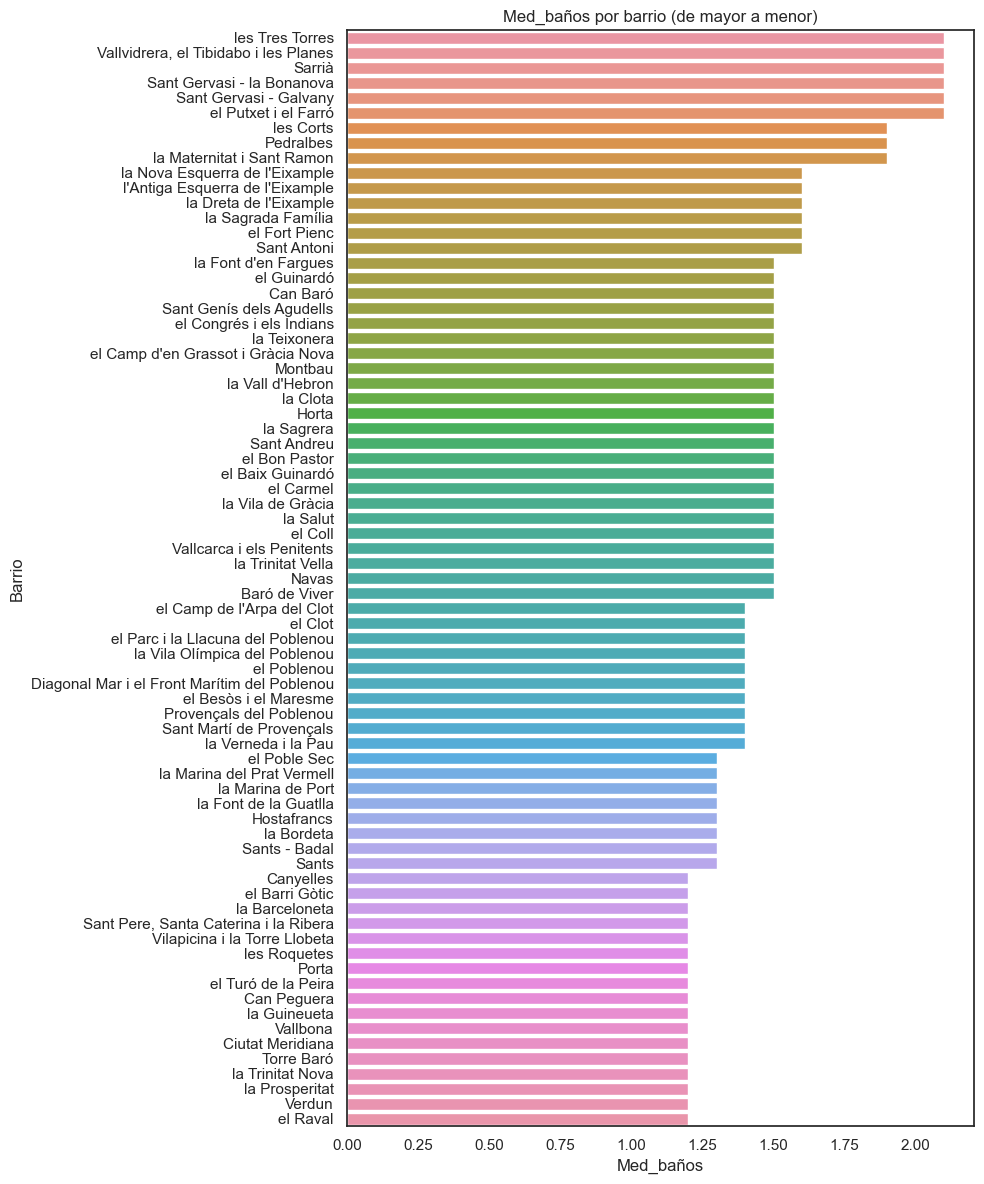

In [304]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Med_baños', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Med_baños', ci=None)

plt.title('Med_baños por barrio (de mayor a menor)')
plt.xlabel('Med_baños')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('Med_baños.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_23364\178396050.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Med_Pers', ci=None)


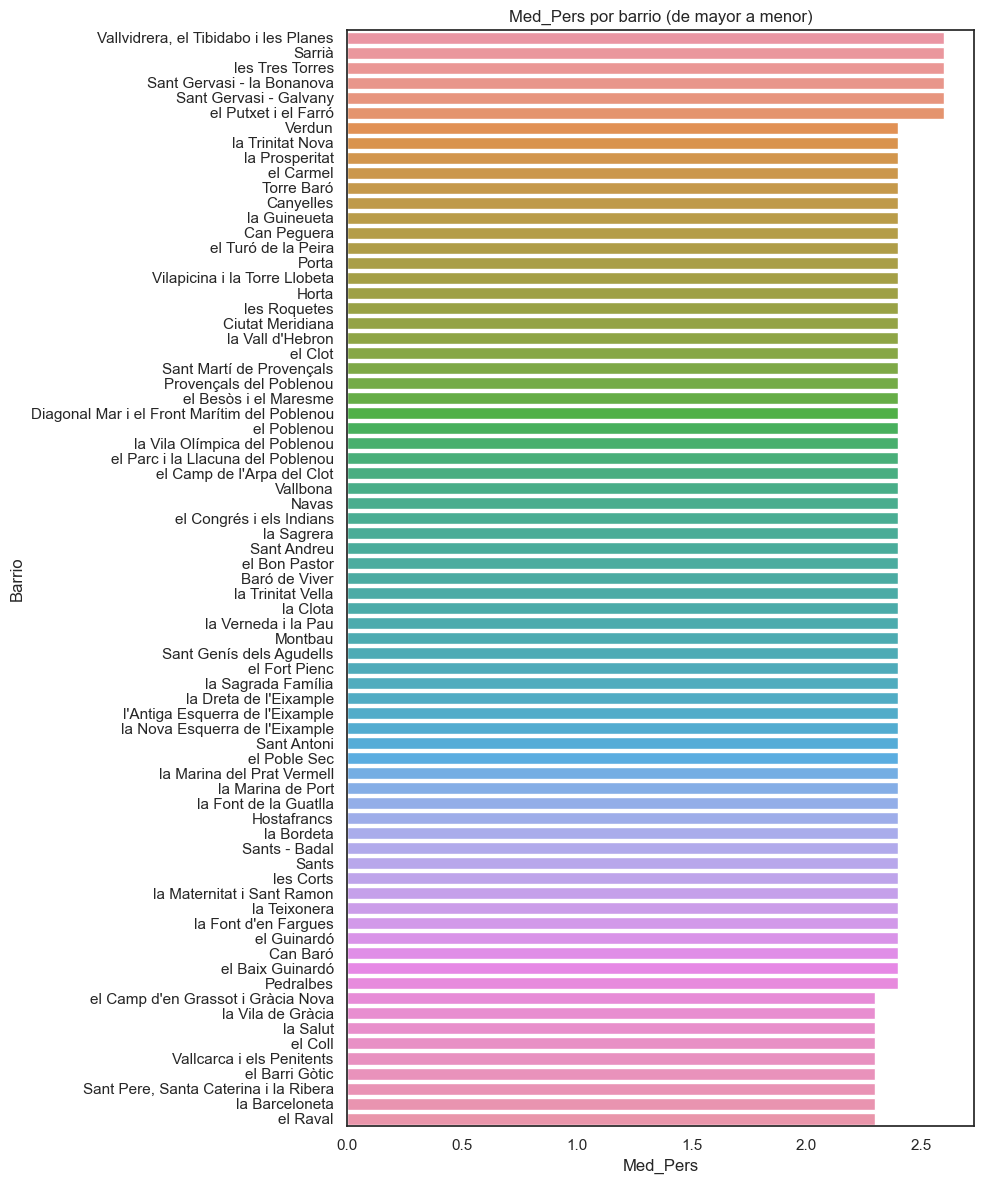

In [305]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Med_Pers', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Med_Pers', ci=None)

plt.title('Med_Pers por barrio (de mayor a menor)')
plt.xlabel('Med_Pers')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('Med_Pers.png')
plt.show()

EN conclusion de las graficas, es destacar que existe una gran sesgo en los datos de algunas variables, como camaras de seguridad, pero puede ser que corresponda a la realidad. 

## EDA

In [543]:
X = df.drop(['Codi_Barri', "Precio anual"], axis=1)
y = df["Precio anual"]

#### TEST DE NORMALIDAD SHAPIRO

In [544]:
from scipy.stats import shapiro
for x in X.columns.values:
    stat, p = shapiro(X[x])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

stat=0.750, p=0.000
Probably not Gaussian
stat=0.894, p=0.000
Probably not Gaussian
stat=0.907, p=0.000
Probably not Gaussian
stat=0.924, p=0.000
Probably not Gaussian
stat=0.823, p=0.000
Probably not Gaussian
stat=0.573, p=0.000
Probably not Gaussian
stat=0.903, p=0.000
Probably not Gaussian
stat=0.944, p=0.003
Probably not Gaussian
stat=0.862, p=0.000
Probably not Gaussian
stat=0.439, p=0.000
Probably not Gaussian


Con la prueba de normalidad de shapiro, comprobamos la normalidad de las variables, como resultado nos da que ninguna varialbe es normal.

<Figure size 800x500 with 0 Axes>

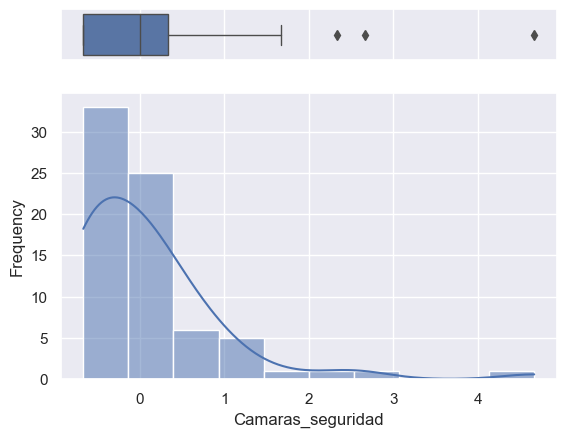

<Figure size 800x500 with 0 Axes>

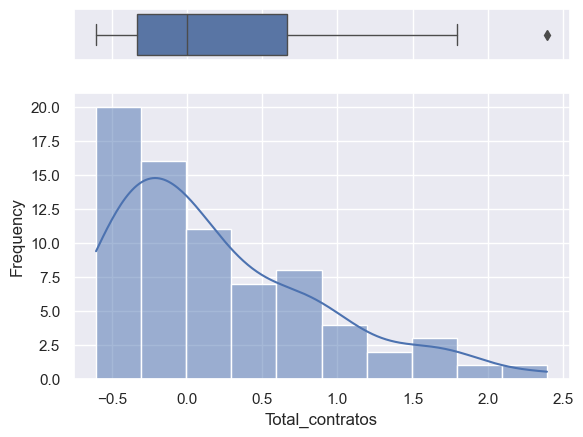

<Figure size 800x500 with 0 Axes>

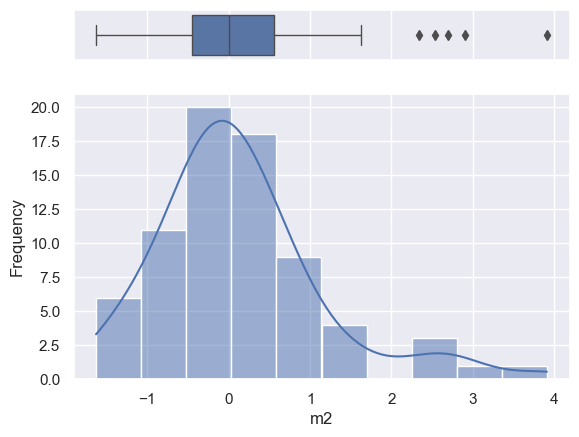

<Figure size 800x500 with 0 Axes>

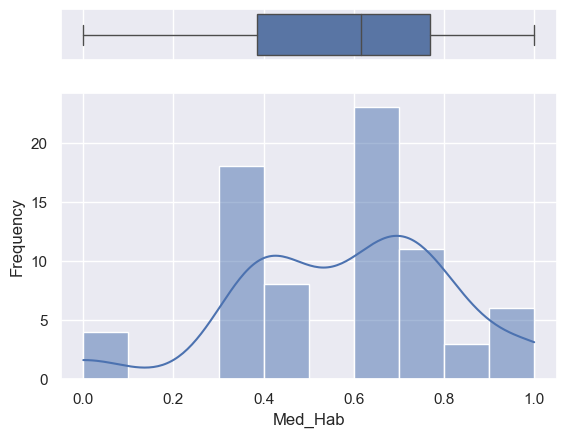

<Figure size 800x500 with 0 Axes>

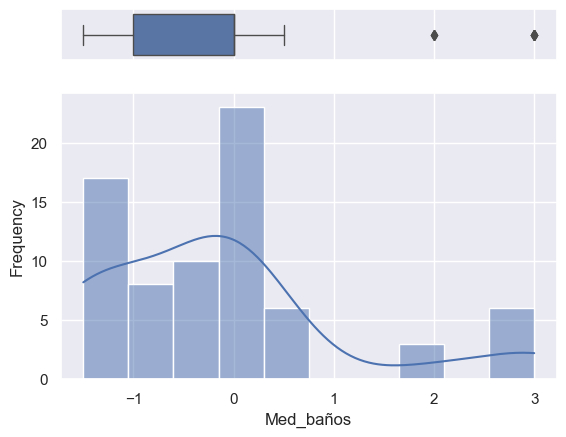

<Figure size 800x500 with 0 Axes>

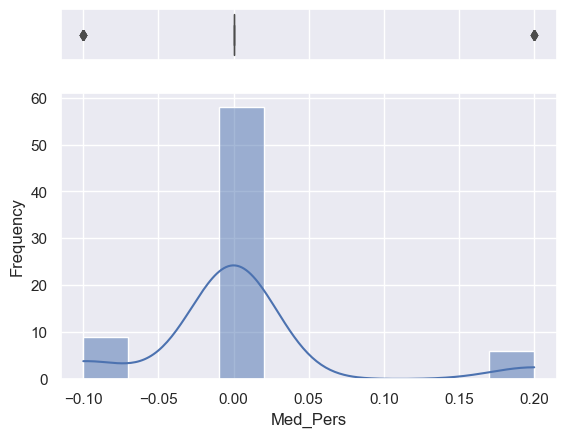

<Figure size 800x500 with 0 Axes>

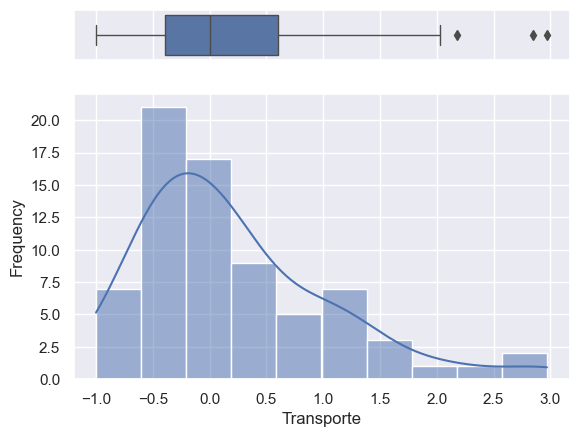

<Figure size 800x500 with 0 Axes>

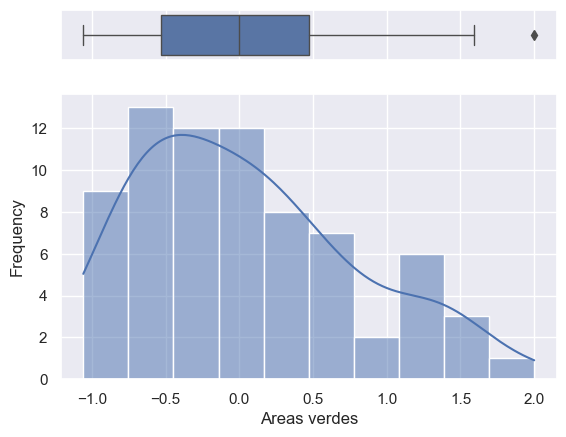

<Figure size 800x500 with 0 Axes>

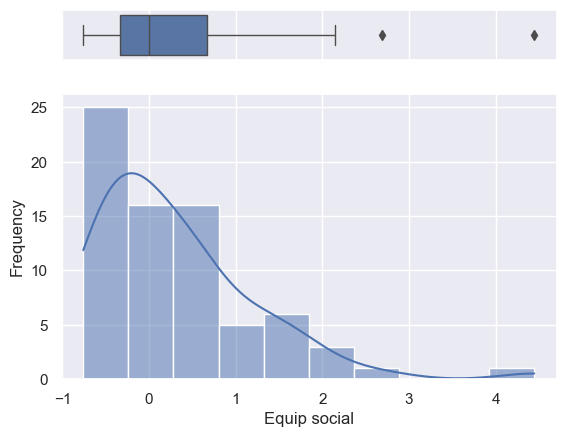

<Figure size 800x500 with 0 Axes>

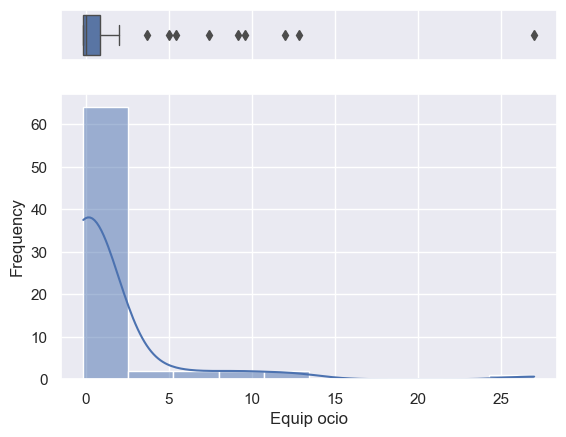

In [632]:
columns= X.columns

for i in columns:
    plt.figure(figsize=(8, 5))
    sns.set()
    
    # Filtra los valores no nulos en la columna actual
    filtered_data = X[X[i].notna()]
    
    # Crea un subplot con dos áreas (boxplot y histograma)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Dibuja el boxplot en la parte superior en posición horizontal
    sns.boxplot(x=filtered_data[i], orient="h", ax=ax_box, linewidth=1.0)
    
    # Dibuja el histograma en la parte inferior
    sns.histplot(filtered_data[i], ax=ax_hist, bins=10, kde=True)
    
    # Añade títulos a los subplots
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=i)
    
    plt.gca().set(xlabel= i,ylabel='Frequency')
    plt.savefig('Boxplot e histogramas.png')

Segun la prueba de normalidad de shapiro, las varianbles no son normales, por tanto vemos con boxplot si hay o no outliers y como resultado es que todas las variables tienen outliers.

'Centres cívics', 'Installacions esportives', "Interiors d'illa", 'Museos','Ocio nocturno', 'Parcs i jardins', 'Restaurants', 'Universitats', 'Zoo', 'Autobus dia', 'Autobus noche', 'Estaciones de autobus', 'Alquiler de vehiculos', 'Aparcamientos', 'Aparcamientos con plazas para bicicletas', 'Gasolineras', 'Puntos de recarga electrica', 'Camaras_seguridad', 'CAPs', 'CUAPs', 'Hospitals', 'Edad_Barri', significa que todas las variables tienen datos extremos.

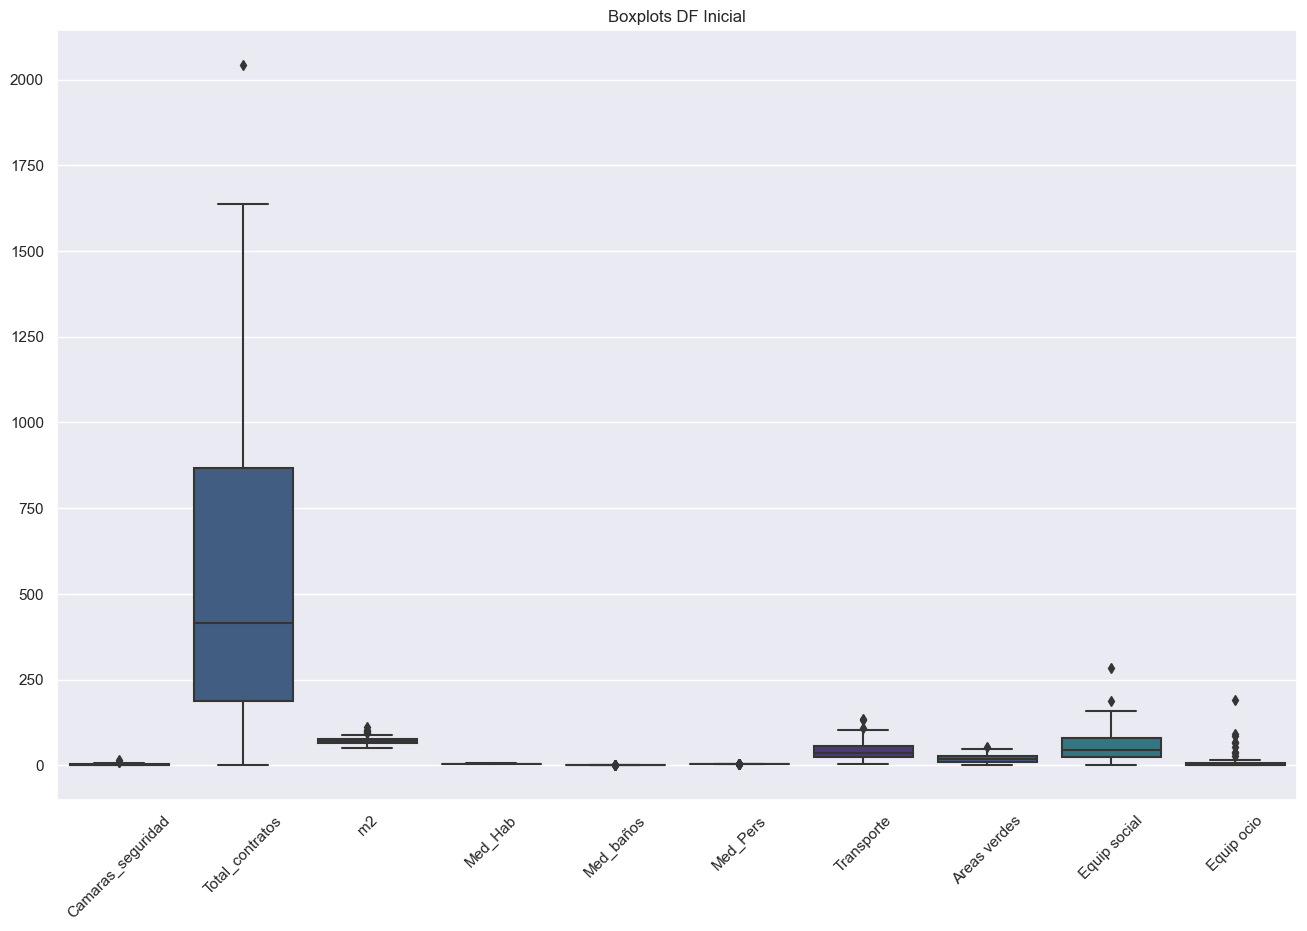

In [546]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=X, palette=sns.color_palette("viridis"))
plt.title('Boxplots DF Inicial')
plt.xticks(rotation=45)
plt.savefig('sin normalizar.png')
plt.show()

En este grafico Boxplot consolidamos todas las variables para tener una idea general del comportamiento de las variables al no ser normales y tener datos expremos. podemos ver variabilidad en el rango intercuartilico, la mediana y los datos atipicos.

## Transformaciones

In [547]:
columnas_escalarr=['Camaras_seguridad', 'Total_contratos', 'm2', 'Med_baños', 'Med_Pers', 'Transporte', 'Areas verdes', 'Equip social', 'Equip ocio' ]
scaler = RobustScaler()
X[columnas_escalarr] = scaler.fit_transform(X[columnas_escalarr])

In [548]:
columnas_escalarmx=['Med_Hab']
scaler = MinMaxScaler()
X[columnas_escalarmx] = scaler.fit_transform(X[columnas_escalarmx])

In [549]:
X

Camaras_seguridad  Total_contratos        m2   Med_Hab  Med_baños  \
0            0.000000         1.335294 -0.447964  0.000000       -1.5   
1            0.333333         0.455882  1.144796  0.000000       -1.5   
2            0.666667        -0.205882 -0.945701  0.000000       -1.5   
3            0.000000         0.897059  0.036199  0.000000       -1.5   
4            0.333333         0.570588  0.769231  0.692308        0.5   
..                ...              ...       ...       ...        ...   
68           2.666667        -0.232353  1.208145  0.615385       -0.5   
69           0.333333        -0.029412 -0.330317  0.615385       -0.5   
70           1.000000        -0.091176  0.447964  0.615385       -0.5   
71          -0.333333        -0.014706  0.420814  0.615385       -0.5   
72          -0.666667         0.752941 -0.294118  0.615385       -0.5   

    Med_Pers  Transporte  Areas verdes  Equip social  Equip ocio  
0       -0.1    0.181818      0.411765      1.203704    9.571429  
1       -0.1    0.030303     -0.294118      0.462963    9.142857  
2       -0.1    0.333333     -0.529412      1.333333    3.714286  
3       -0.1    0.121212      1.117647     -0.259259   27.000000  
4        0.0    0.060606      0.882353      1.666667    1.142857  
..       ...         ...           ...           ...         ...  
68       0.0    0.212121      0.705882      0.000000   -0.142857  
69       0.0    0.151515      1.352941     -0.037037    0.142857  
70       0.0    0.181818      0.411765     -0.444444    0.142857  
71       0.0   -0.424242      0.470588      0.703704   -0.142857  
72       0.0    0.000000      1.588235      0.537037   -0.142857  

[73 rows x 10 columns]

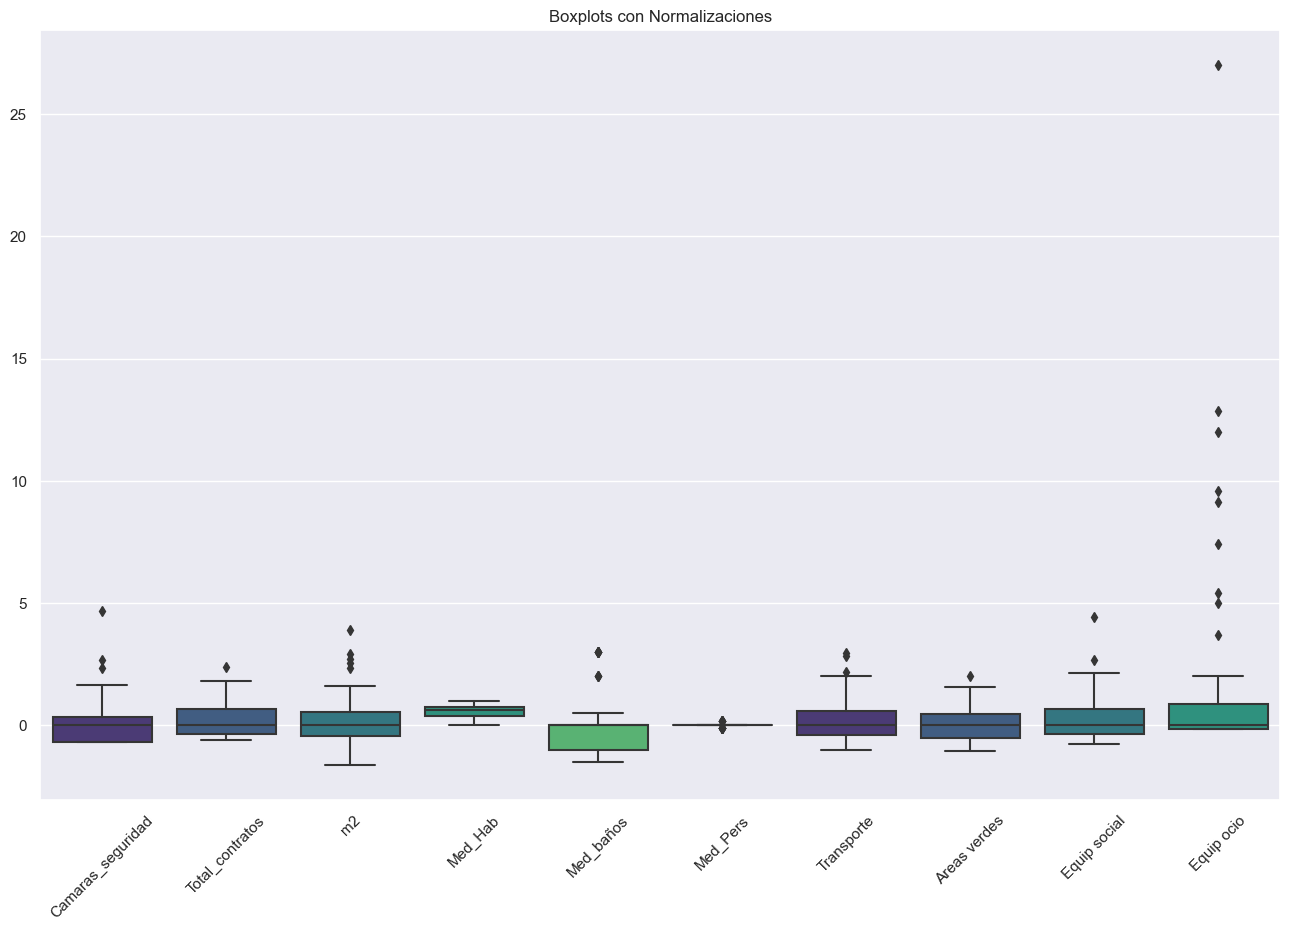

In [550]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=X, palette=sns.color_palette("viridis"))
plt.title('Boxplots con Normalizaciones')
plt.xticks(rotation=45)
plt.savefig('normalizados.png')
plt.show()

In [551]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### MODELOS

In [552]:
rfr = RandomForestRegressor(random_state=42)
Xg =  xgb.XGBRegressor(random_state=42)


¿ Por que se escogieron ?


rfr = RandomForestRegressorRandom Forest (Bosque Aleatorio):

Ensamble de árboles: Random Forest es un algoritmo de ensamble que combina múltiples árboles de decisión para realizar predicciones. Cada árbol en el bosque se entrena de forma independiente utilizando una muestra aleatoria de los datos de entrenamiento y una selección aleatoria de características.

Bagging: Random Forest utiliza un enfoque llamado "bagging" (Bootstrap Aggregating), donde se generan múltiples muestras de entrenamiento a partir del conjunto de datos original mediante muestreo con reemplazo. Cada árbol se entrena en una de estas muestras y luego las predicciones se combinan mediante votación o promedio.

Aleatoriedad y diversidad: Para aumentar la diversidad entre los árboles del bosque, Random Forest introduce aleatoriedad en la selección de características en cada nodo y en la selección de muestras de entrenamiento. Esto ayuda a reducir el sobreajuste y mejorar la generalización del modelo.

Predicción: Para realizar una predicción de regresión, cada árbol en el bosque devuelve una estimación numérica. La predicción final se calcula promediando las predicciones de todos los árboles en el bosque.

XGBoost (Extreme Gradient Boosting):

Refuerzo de Gradientes: XGBoost es una implementación eficiente del algoritmo de refuerzo de gradientes, que es una técnica de aprendizaje automático supervisado para problemas de regresión y clasificación.

Construcción secuencial de árboles: XGBoost entrena una secuencia de árboles de decisión de forma secuencial, donde cada árbol se construye para corregir los errores del modelo anterior. Esto se hace minimizando una función de pérdida que mide la discrepancia entre las predicciones del modelo y los valores reales.

Regularización y control de sobreajuste: XGBoost incorpora técnicas de regularización para evitar el sobreajuste, como la penalización por la complejidad del modelo y la penalización por la magnitud de los coeficientes de las características.

Predicción: Al igual que Random Forest, XGBoost realiza predicciones de regresión combinando las predicciones de múltiples árboles. La predicción final se calcula sumando las predicciones de cada árbol, ponderadas por un factor que refleja la contribución de cada árbol al modelo final.


cabe destacar que se hicieron alrededor de 6 procesos distintos evaluando diversos modelos: 
Se estudiaron modelos como DecisionTreeRegressor, Lasso, GradientBoostingRegressor(), SVR, sin embargo por la naturaleza de los datos se fueron descartando siempre favoreciendo los modelos que mejores metricas resultaban, por tanto es destacable decir que este proceso no fue lineal, tuvo variaciones, fracasos, errores y al final se volvio a hacer el proceso solo con los dos mejores modelos de todo este estudio. 

In [553]:
models = [rfr, Xg]

In [554]:
predictions = {}

# Entrenar y predecir con cada modelo
for model in models:
    model_name = type(model).__name__
    model.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(X_test)  # Realizar predicciones
    predictions[model_name] = y_pred  # Almacenar predicciones en el diccionario

# Crear un DataFrame con las predicciones
df_predictions = pd.DataFrame(predictions)

Con un ciclo for hacemos predicciones para cada modelo de los tres escogidos.

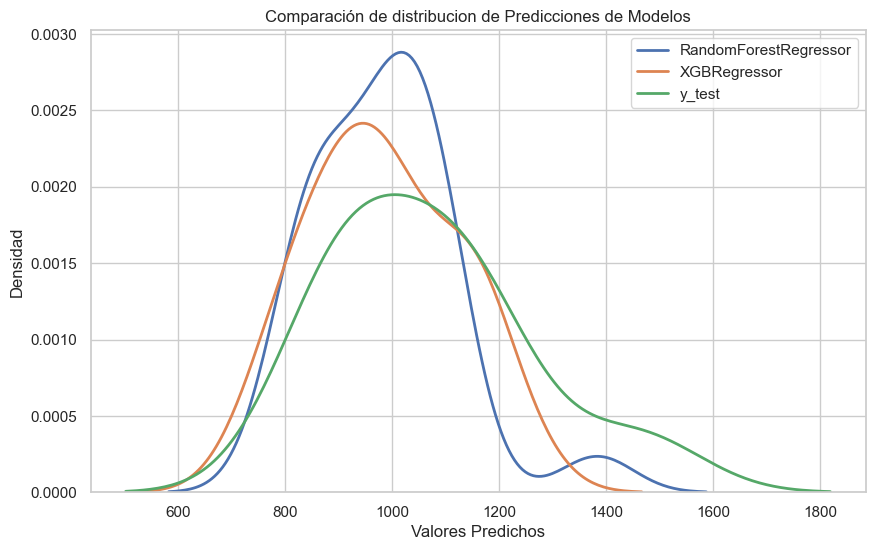

In [556]:
df_predictions['y_test'] = y_test
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for model_name in df_predictions.columns:
    sns.kdeplot(df_predictions[model_name], label=model_name, linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Densidad')
plt.title('Comparación de distribucion de Predicciones de Modelos')
plt.legend()
plt.savefig('comparacion_predicciones1.png')
plt.show()

Vemos la adaptabilidad de los modelos al y_test, aunque no son extremadamente malas las predicciones, si que existen diferencias visibles que hacen pensar que los modelos no se estan adaptando muy bien al y_test.

In [557]:
score_mean = []
score_std = []

for model in models:
    scores = cross_val_score(model, X, y, cv=3, scoring='r2')
    score_mean.append(scores.mean())
    score_std.append(scores.std())

# Crear un DataFrame para almacenar los resultados
evaluation = pd.DataFrame({'Modelo': ['RandomForestRegressor', 'XGBRegressor'],
                           'Mean_R2_Score': score_mean,
                           'Std_R2_Score': score_std})

print(evaluation)

                  Modelo  Mean_R2_Score  Std_R2_Score
0  RandomForestRegressor       0.410520      0.252043
1           XGBRegressor       0.288246      0.326819


Nuestra cross validation, da como resultado la media del r2 para cada modelo, el modelo que su r2 sea mas cercano al 1 es el modelo que mas se adapta a nuestro y_test. RandomForestRegressor es el mejor pero con un r2 bajo, aunque su desviacion estandar no es muy alta, es mejor que el XGBRegressor.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


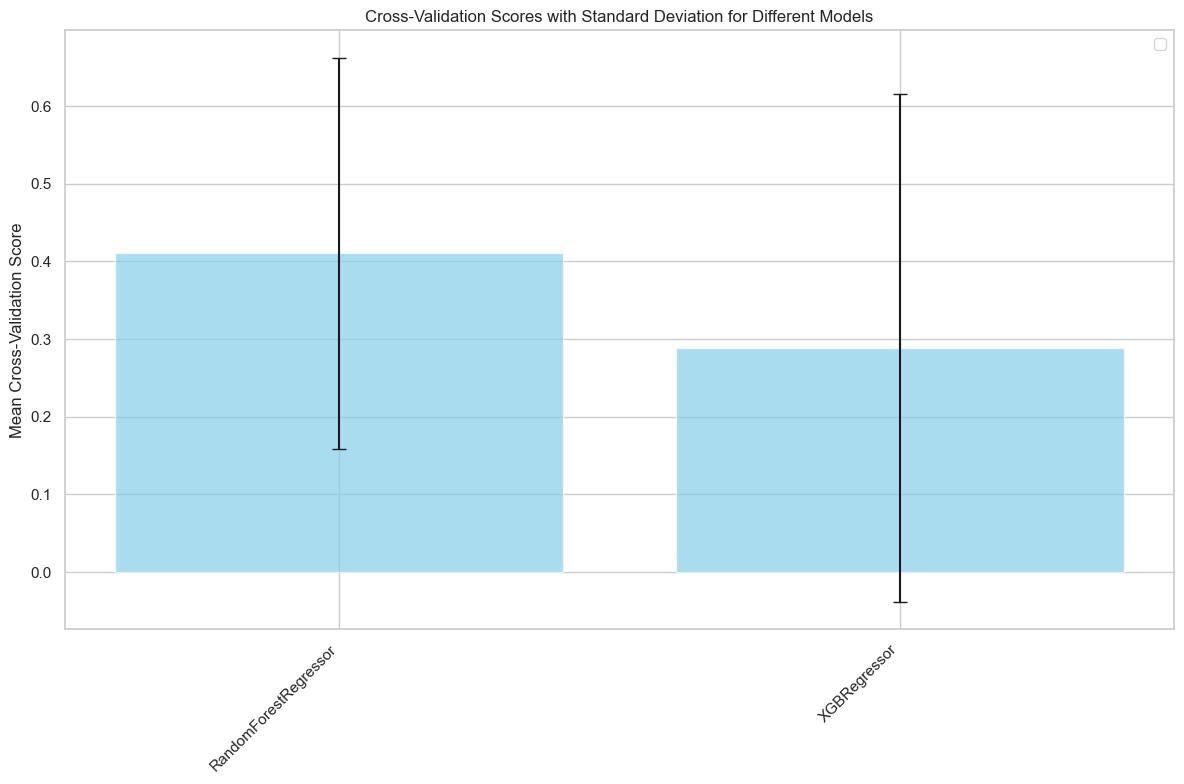

In [558]:
plt.figure(figsize=(12, 8))

# Barras para los modelos principales
plt.bar(evaluation['Modelo'], evaluation['Mean_R2_Score'], 
        yerr=evaluation['Std_R2_Score'], capsize=5, alpha=0.7, color='skyblue')

# Configuraciones adicionales del gráfico
plt.ylabel('Mean Cross-Validation Score')
plt.title('Cross-Validation Scores with Standard Deviation for Different Models')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejorar la legibilidad
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('Cross-validation with Standar Desviation1.png')
plt.show()

Este grafico de barra de error, nos muestra las puntuaciones de Mean Cross-Validation Score de cada modelo (barras azules) y la linea de error (negra), nos muestra la Standard Deviation de cada modelo, el centro de la barra de error siempre sera el limite de los datos (o borde con Gráficos de Barras). esto nos muestra la dispersion para cada modelo y se identifica que el modelo con menor dispersión es el RandomForestRegressor.

In [559]:
df_predict=df_predictions.drop('y_test',axis=1)

In [560]:
output1 = [] # Almacena los resultados
for model_name, y_pred in df_predict.items(): # Recorre los modelos y sus predicciones
    mse = mean_squared_error(y_test, y_pred) # Calcula MSE
    r2 = r2_score(y_test, y_pred) # Calcula R^2
    mae = mean_absolute_error(y_test, y_pred) # Calcula MAE
    output1.append({
        'Model': model_name, 
        'MSE': mse, 
        'MAE': mae,
        'R^2': r2
    }) 
output_df1 = pd.DataFrame(output1) # Crea dataframe con los resultados
output_df1.to_csv('metricas_modelos_estandar.csv', index=False)
print(output_df1)

                   Model           MSE         MAE       R^2
0  RandomForestRegressor   7535.871207   73.202660  0.741023
1           XGBRegressor  23261.976322  115.621855  0.200580


##### Comparacion de metricas de modelos estandar:
El MSE (Mean Squared Error): es una métrica comúnmente utilizada en machine learning para evaluar el rendimiento de modelos de regresión. Al igual que el MAE, el MSE también mide la calidad de las predicciones de un modelo, pero de manera ligeramente diferente.

El MSE se calcula como la media de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales de los datos.

En general esta metrica es mala para todos mis modelos, El modelo con mas ajuste (Las predicciones estan mas cerca de valores reales o sea a 0 ), a los datos (promedio de errrores al cuadrado), es: RandomForestRegressor con 7535.87, luego el XGBRegressor con 23261.97.

El MAE (Mean Absolute Error): es una métrica comúnmente utilizada en machine learning para evaluar el rendimiento de un modelo de regresión. Mide la magnitud promedio de los errores en las predicciones de un modelo, calculando la diferencia absoluta entre las predicciones del modelo y los valores reales de los datos. 

Quise aplicar esta metrica a mis modelos por que es mas robusta que el MSE, viendo que se tuvo muy malos puntajes, sin embargo aunque mejora las puntuaciones respecto al MSE,  siguen siendo malos puntajes: RandomForestRegressor con 73.20, luego el  XGBRegressor con 115.62.

R2(coheficiente de determinacion): es una métrica importante en la evaluación de modelos de regresión. Indica cuánta variabilidad en la variable dependiente puede explicar el modelo.

El modelo con mejor ajuste a los datos ( R2 tiene un rango entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: RandomForestRegressor con 0.74, luego el XGBRegressor con 0.20.

Conclusion: Aunque en el r2 el modelo RandomForestRegressor, parece mucho mas exacto vemos que en metricas como MAE Y MSE, las metricas son malas por tanto no me permite tener una total confianza en este modelo. 

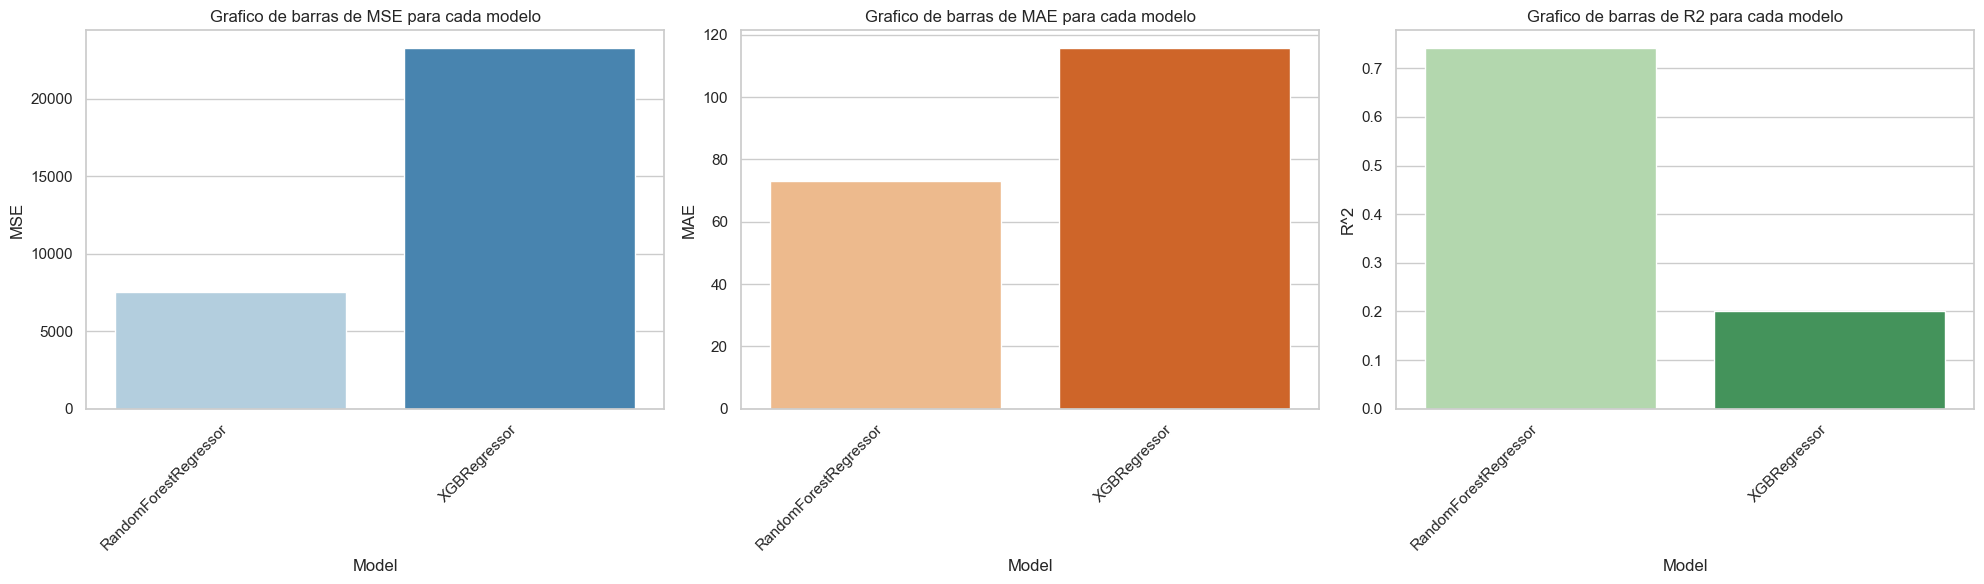

In [562]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Gráfico para MSE
sns.barplot(x='Model', y='MSE', data=output_df1, palette="Blues", ax=axes[0])
axes[0].set_title('Grafico de barras de MSE para cada modelo')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

# Gráfico para MAE
sns.barplot(x='Model', y='MAE', data=output_df1, palette="Oranges", ax=axes[1])
axes[1].set_title('Grafico de barras de MAE para cada modelo')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

# Gráfico para R^2
sns.barplot(x='Model', y='R^2', data=output_df1, palette="Greens", ax=axes[2])
axes[2].set_title('Grafico de barras de R2 para cada modelo')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

plt.tight_layout()
plt.savefig('comparacion inicial de modelos y sus metricas.png')
plt.show()

Podemos ver el comportamiento de las metricas para las modelos graficamente, vemos que sus puntajes son muy elevados en el MSE Y EL MAE, el r2 parece ser mucho mejor.

#### HIPER-PARAMETROS

In [322]:
rfr2 = RandomForestRegressor(random_state=42)
Xg2 =  xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [323]:
rfr2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [324]:
parametros_random_forest = {
    'max_depth': [None, 10, 20],
    'max_features': [1.0, 'sqrt'],
    'max_leaf_nodes': [None, 5, 10],
    'max_samples': [None, 0.5, 2],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 500],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse','poisson']
}
grid_search_rf = GridSearchCV(estimator=rfr2, param_grid=parametros_random_forest, cv=3, scoring='r2', error_score='raise')
grid_search_rf.fit(X_train, y_train)
best_rfr2_model = grid_search_rf.best_estimator_
print(f'Best r2-score: {grid_search_rf.best_score_:.3f}\n')
print("Mejores parámetros para RandomForestRegressor:", grid_search_rf.best_params_)

Best r2-score: 0.525

Mejores parámetros para RandomForestRegressor: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': 5, 'max_samples': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [325]:
Xg2.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [326]:
parametros_Xg2 = {
  'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}
grid_search_Xg2 = GridSearchCV(estimator=Xg2, param_grid=parametros_Xg2, cv=3, scoring='r2')
grid_search_Xg2.fit(X_train, y_train)
best_Xg2_model = grid_search_Xg2.best_estimator_
print(f'Best r2-score: {grid_search_Xg2.best_score_:.3f}\n')
print("Mejores parámetros para Linear Regressor:", grid_search_Xg2.best_params_)

Best r2-score: 0.509

Mejores parámetros para Linear Regressor: {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 1.0}


In [634]:
best_models = [('RandomForest', rfr),
               ('XGB', best_Xg2_model)]


In [635]:
predictions2 = {}
for model_name, model in best_models:
    y_pred = model.predict(X_test)
    predictions2[model_name] = y_pred
df_predictions2 = pd.DataFrame(predictions2)

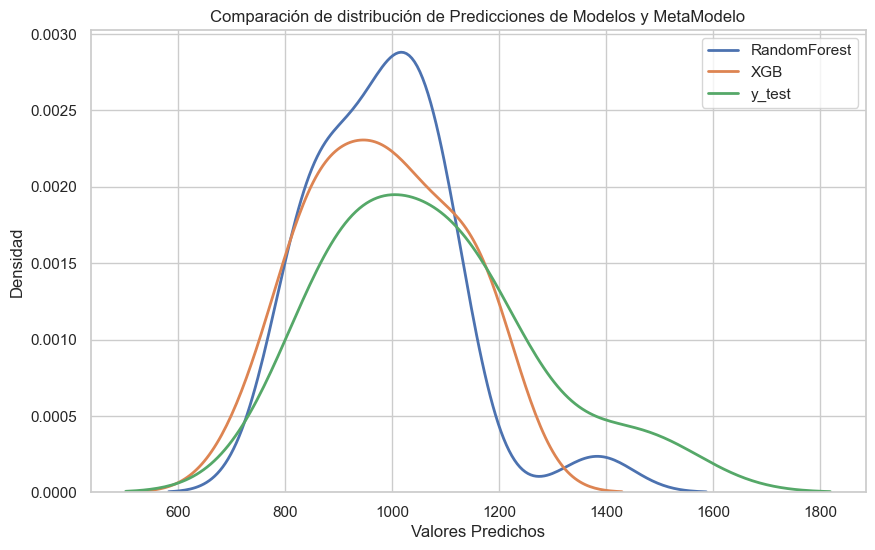

In [636]:
df_predictions2['y_test'] = y_test
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
for model_name in df_predictions2.columns:
    sns.kdeplot(df_predictions2[model_name], label=model_name, linewidth=2)

# Configuraciones del gráfico
plt.xlabel('Valores Predichos')
plt.ylabel('Densidad')
plt.title('Comparación de distribución de Predicciones de Modelos y MetaModelo')
plt.legend()
plt.savefig('comparacion_predicciones de dos .png')
plt.show()

Al manipular mis parametros en busqueda de su mejora y un mejor ajuste de mis modelos al y_test no veo cambios significativos en el rendmiento de los modelos graficamente, por eso antes de seguir ocn el proceso, decido explorar formas adicionales de mejorar mis predicicones y mis rendmientos, para ello vamos a utilizar un meta modelo. 

In [576]:
meta_features = np.column_stack(predictions2.values())

In [577]:
meta_model = LinearRegression()
meta_model.fit(meta_features, y_test)

LinearRegression()

In [578]:
meta_preds = meta_model.predict(meta_features)

In [579]:
df_predictions2['MetaModel'] = meta_preds
df_predictions2['y_test'] = y_test

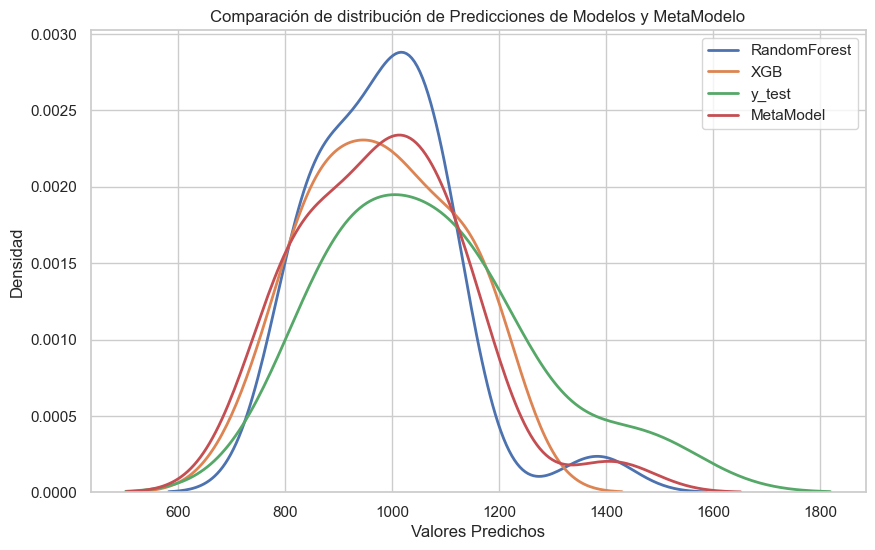

In [580]:
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
for model_name in df_predictions2.columns:
    sns.kdeplot(df_predictions2[model_name], label=model_name, linewidth=2)

# Configuraciones del gráfico
plt.xlabel('Valores Predichos')
plt.ylabel('Densidad')
plt.title('Comparación de distribución de Predicciones de Modelos y MetaModelo')
plt.legend()
plt.savefig('comparacion_predicciones2.png')
plt.show()

En esta grafica kde, podemos ver el comportamiento de los modelos mejorados, pero tambien podemos ver el comportamiento del meta modelo en rojo, respecto al y_test, en verde, vemos como el meta modelo, parece ser ahora el mas cercano al y_test, sin embargo tambien es importante destacar que el XGB en naranja, parece tambien ser cercano al y_test, el RandomForestRegressor parece no haber mejorado vidualmente frente a su version original. 

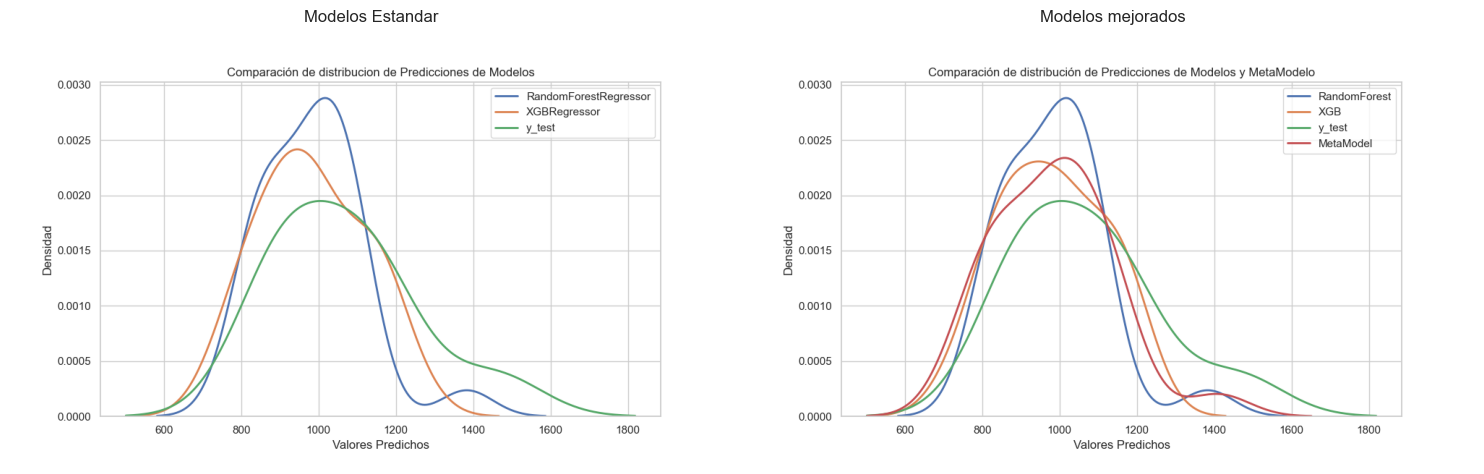

In [581]:
imagen1 = mpimg.imread('comparacion_predicciones1.png')
imagen2 = mpimg.imread('comparacion_predicciones2.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen1)
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].set_title('Modelos Estandar')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen2)
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].set_title('Modelos mejorados')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.savefig('comparacion_predicciones2.png')
# Mostrar la figura
plt.show()

En la comparativa de las graficas KDE, podemos observar el comportamiento de los modelos antes y despues de mejorar sus hiperparametros, el modelo  RandomForestRegressor (azul), sigue teniendo el comportamiento igual antes y despues de ser mejorado por tanto podemos decir que graficamente no ha tenido alguna variacion, El XGBRegressor (Naranja), ha cambiado su comportamiento respecto al y_test, frente al anterior, parece graficamente que se adapta mejor al y_test; pero tambien vemos como el meta modelo ( union de las predicciones de ambos modelos ) graficamente pareciera que se adapta mejor a el y_test, que cualquiera de los otros dos. asi que podemos concluir que optar por hacer un meta modelo podria funcionar, sin embargo debemos confirmarlo con las metricas. 

In [452]:
df_predict22=df_predictions2.drop('y_test',axis=1)

In [453]:
output2 = [] # Almacena los resultados actualizados
for model_name, y_pred in df_predict22.items(): # Recorre los modelos y sus predicciones
    mse = mean_squared_error(y_test, y_pred) # Calcula MSE
    r2 = r2_score(y_test, y_pred) # Calcula R^2
    mae = mean_absolute_error(y_test, y_pred) # Calcula MAE
    output2.append({
        'Model': model_name, 
        'MSE': mse, 
        'MAE': mae,
        'R^2': r2
    }) 
output_df2 = pd.DataFrame(output2) # Crea dataframe con los resultados actualizados
output_df2.to_csv('metricas_modelos_actualizadas.csv', index=False) # Guarda el DataFrame en un archivo CSV con un nombre diferente
print(output_df2) # Muestra las métricas actualizadas

          Model           MSE        MAE       R^2
0  RandomForest   7525.299952  73.122240  0.741386
1           XGB  13131.708117  90.403769  0.548716
2     MetaModel   6895.917331  68.387411  0.763015


#### Comparacion de metricas de modelos estandar:
El MSE (Mean Squared Error):  En general esta metrica es mala para todos mis modelos otra vez, El modelo con mas ajuste (Las predicciones estan mas cerca de valores reales o sea a 0 ), a los datos (promedio de errrores al cuadrado), es: Meta model con 6895.91,  RandomForestRegressor con  7525.29 y  luego el XGBRegressor con 13131.70.

El MAE (Mean Absolute Error): para esta metrica el que es mas robusta, el Metamodel es el mejor con   68.38, aunque su mejora no fue sustancial, en comparacion con los demas, pero es mejor. RandomForestRegressor con 73.12, luego el XGBRegressor con 90.40

R2(coheficiente de determinacion): El modelo con mejor ajuste a los datos ( R2 tiene un rango entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: Meta modelo con 0.76, luego el RandomForestRegressor con 0.74, luego el XGBRegressor con 0.54.

Conclusion: Optar por crear el Mata modelo parece que fue buena opcion para mejorar los rendimeintos de mis modelos, aunque las metricas MSE Y MAE, tiene errores relativamente altos, el ajuste de mis predicciones r2 con mis datos es mejor ahora y me genera mas ocnfianza. 

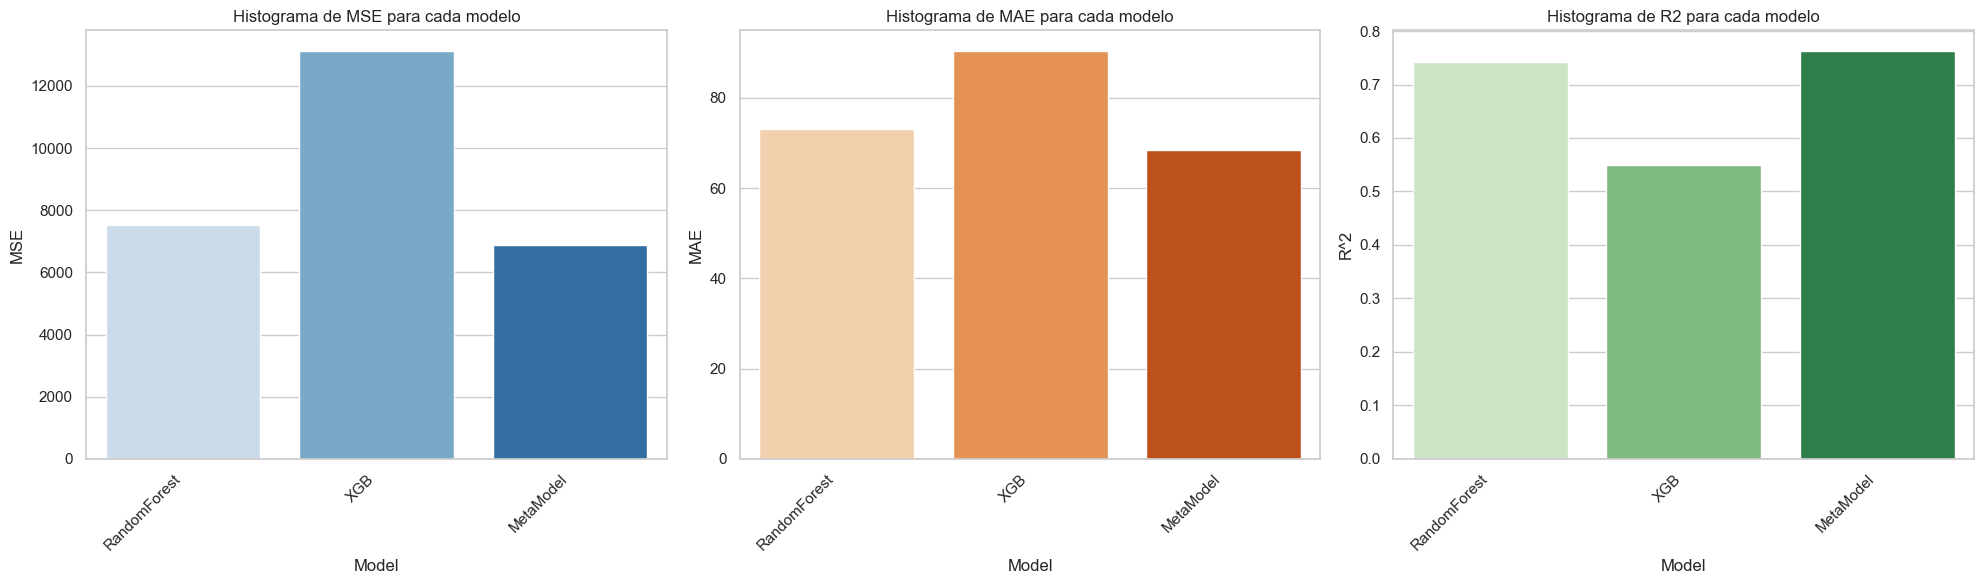

In [582]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Gráfico para MSE
sns.barplot(x='Model', y='MSE', data=output_df2, palette="Blues", ax=axes[0])
axes[0].set_title('Histograma de MSE para cada modelo')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

# Gráfico para MAE
sns.barplot(x='Model', y='MAE', data=output_df2, palette="Oranges", ax=axes[1])
axes[1].set_title('Histograma de MAE para cada modelo')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

# Gráfico para R^2
sns.barplot(x='Model', y='R^2', data=output_df2, palette="Greens", ax=axes[2])
axes[2].set_title('Histograma de R2 para cada modelo')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

plt.tight_layout()
plt.savefig('comparación de modelos y sus metricas mejoradas.png')
plt.show()

ahora vemos visualmente estas metricas el Metamode en MSE Y MAE tiene las metricas mas bajas y en el r2 el puntaje mas alto. 

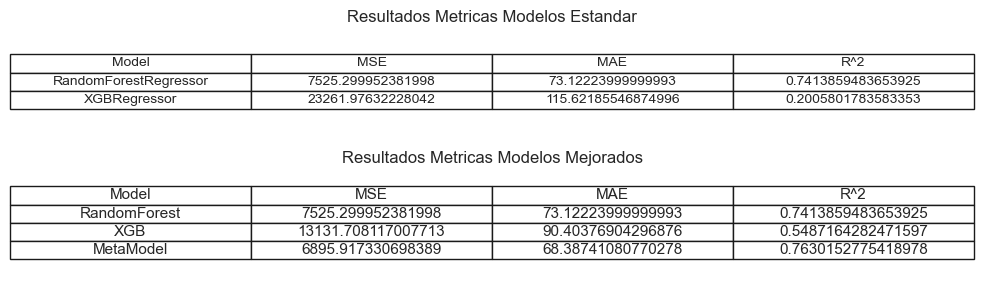

In [455]:
resultados1 = pd.read_csv('metricas_modelos_estandar.csv')
resultados2 = pd.read_csv('metricas_modelos_actualizadas.csv')

# Configurar la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 3))  # 2 filas, 1 columnas
plt.subplots_adjust(top=0.8)
# Mostrar la tabla 1 en el primer subplot
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].table(cellText=resultados1.values,
             colLabels=resultados1.columns,
             cellLoc='center',
             loc='center')
axs[0].set_title('Resultados Metricas Modelos Estandar')

# Mostrar la tabla 2 en el segundo subplot
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].table(cellText=resultados2.values,
             colLabels=resultados2.columns,
             cellLoc='center',
             loc='center')
axs[1].set_title('Resultados Metricas Modelos Mejorados')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.savefig('Comparacion y resultados de modelos y sus metricas mejoradas.png')
# Mostrar la figura
plt.show()

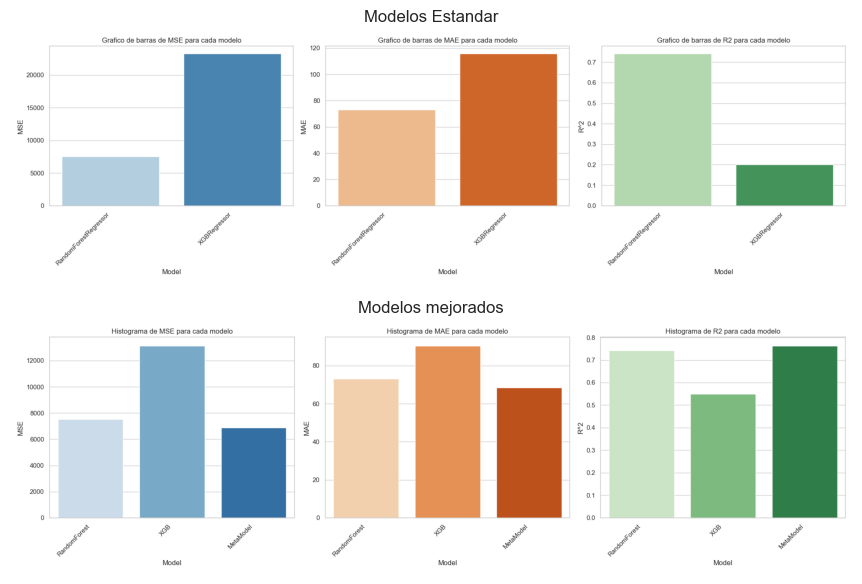

In [583]:
imagen1 = mpimg.imread('comparacion inicial de modelos y sus metricas.png')
imagen2 = mpimg.imread('comparación de modelos y sus metricas mejoradas.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen1)
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].set_title('Modelos Estandar')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen2)
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].set_title('Modelos mejorados')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.savefig('Comparacion y resultados de modelos y sus metricas mejoradas en barras.png')
# Mostrar la figura
plt.show()

#### Comparacion de metricas de modelos estandar y modelos mejorados con la incorporacion del Meta modelo

En comparacion visual las metricas mejoraron mejorando los moddelos y aplicando un Metamodelo, asi que fue una buena decision aportar por el Metamodelo. 

In [585]:
cv_scores_list_main = []
model_names_main = []

for model_name, model in best_models:
    cv_scores = cross_val_score(model, X, y, cv=3, scoring='r2')
    print(f"{model_name} - Mean Cross-Validation Score: {np.mean(cv_scores)}")
    print(f"{model_name} - Standard Deviation of Cross-Validation Scores: {np.std(cv_scores)}")
    print(cv_scores)
    
    cv_scores_list_main.append(cv_scores)
    model_names_main.append(model_name)

RandomForest - Mean Cross-Validation Score: 0.4105201282198277
RandomForest - Standard Deviation of Cross-Validation Scores: 0.25204326699556673
[0.08341534 0.69671247 0.45143258]
XGB - Mean Cross-Validation Score: 0.32701274640762906
XGB - Standard Deviation of Cross-Validation Scores: 0.2781866692145293
[-0.06638674  0.52677309  0.52065189]


La media de Cross Validation es mejor para el RandomForest con 0.41 y desviacion estandar de: 0.25 , el XBG tiene una media de 0.27 y una desviacion estandar de: 0.27, pero ademas el comportamiento de los pliegues es muy similar en los dos modelos. 

In [458]:
means_main = [np.mean(scores) for scores in cv_scores_list_main]

In [459]:
meta_cv_scores = cross_val_score(meta_model, meta_features, y_test, cv=3, scoring='r2')
print(f"Meta-Modelo - Mean Cross-Validation Score: {np.mean(meta_cv_scores)}")
print(f"Meta-Modelo - Standard Deviation of Cross-Validation Scores: {np.std(meta_cv_scores)}")
print(meta_cv_scores)

Meta-Modelo - Mean Cross-Validation Score: 0.5038334215079358
Meta-Modelo - Standard Deviation of Cross-Validation Scores: 0.24796426944913466
[0.23504868 0.83327833 0.44317326]


La media de Cross Validation es de 0.50, mejor que la de los dos modelos base y la desviacion estandar es de 0.24, mejor que las dos de los modelos base, los pliegues mantiene un comportamiento similar a la de los modelos base. 

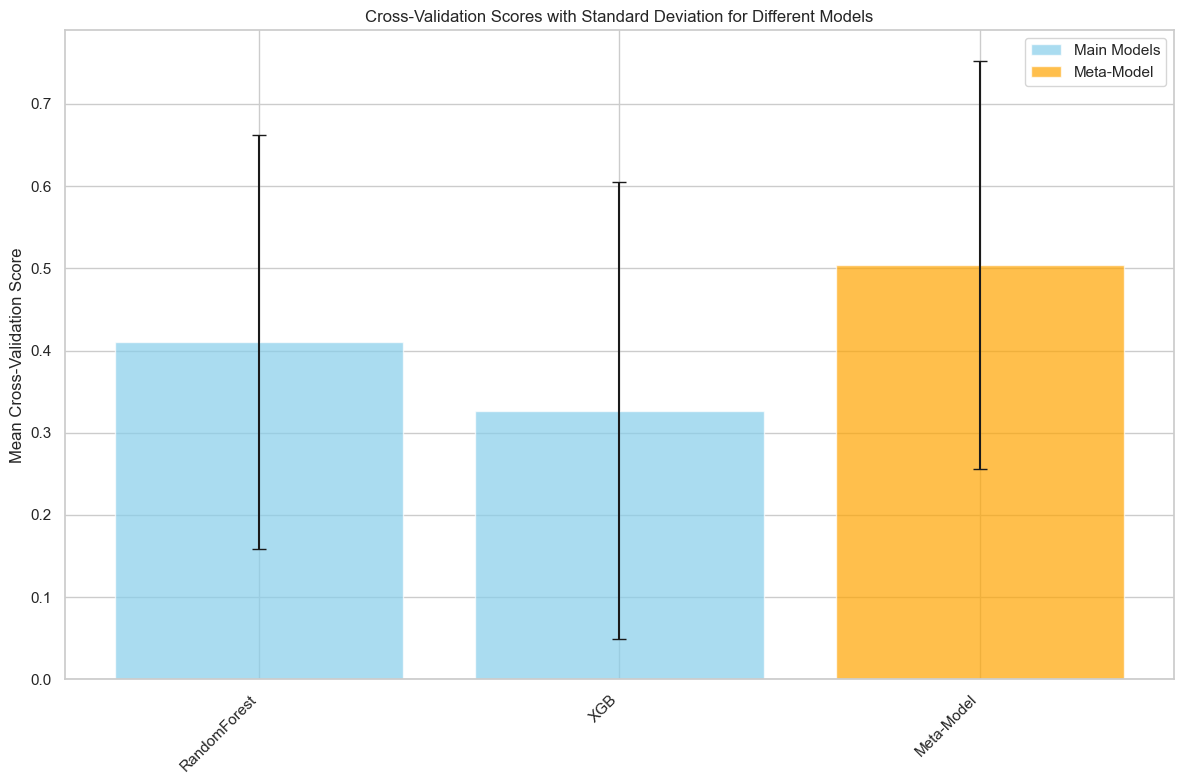

In [460]:
plt.figure(figsize=(12, 8))

# Barras para los modelos principales
plt.bar(model_names_main, means_main, yerr=[np.std(scores) for scores in cv_scores_list_main], capsize=5, alpha=0.7, color='skyblue', label='Main Models')

# Barra para el meta-modelo
plt.bar('Meta-Model', np.mean(meta_cv_scores), yerr=np.std(meta_cv_scores), capsize=5, alpha=0.7, color='orange', label='Meta-Model')

# Configuraciones del gráfico
plt.ylabel('Mean Cross-Validation Score')
plt.title('Cross-Validation Scores with Standard Deviation for Different Models')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejorar la legibilidad
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('Cross-validation with Standar Desviation2.png')
plt.show()

Este grafico de barra de error, nos agrega el Metamodelo, vemos que su cross validation es mejor que la de los dos otros modelos y vemos la desviacion estandar que es similar en los tres. 

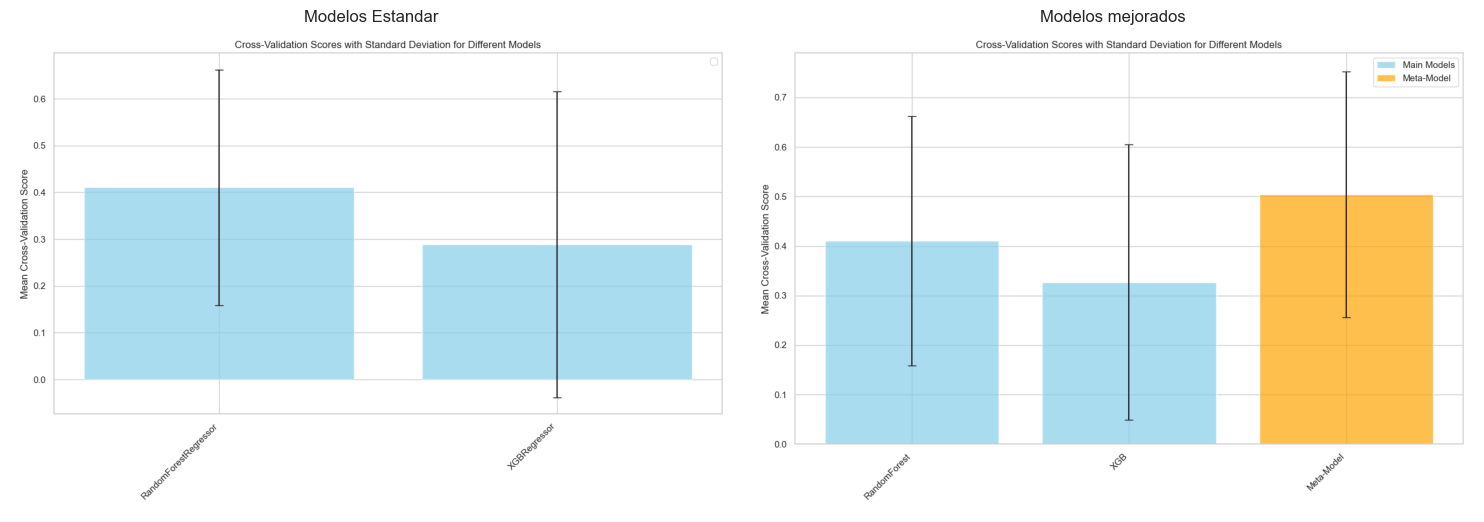

In [637]:
imagen1 = mpimg.imread('Cross-validation with Standar Desviation1.png')
imagen2 = mpimg.imread('Cross-validation with Standar Desviation2.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen1)
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].set_title('Modelos Estandar')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen2)
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].set_title('Modelos mejorados')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.savefig('Comparacion y resultados de modelos y sus metricas mejoradas en barras.png')
# Mostrar la figura
plt.show()

En esta comparacion de la cross validation antes y despues vemos que RandomForest se mantuvo igual a su corss validation anterior pero XGB, es mejoro su score, pero ratifica que el implemnentar el Meta modelo fue una buena decision para nuestro caso. mejoro en metricas y cross validation, manteniendo undesviacion estandar similar a la de los modelos base. 

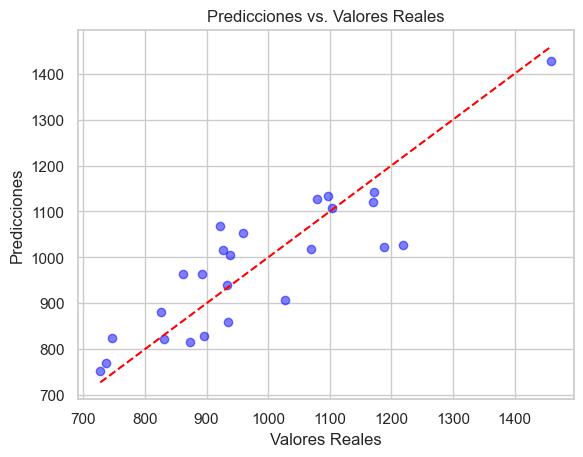

In [462]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Scatter plot de valores reales vs. predicciones
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea diagonal de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.savefig('Diagrama de dispersion.png')
plt.show()

Aqui vemos el comportamiento de las predicciones respecto al target, los puntos azules son las predicciones y la linea roja punteada el target, aunque vemos que nos es totalmente exacto, como ya era de esperar por el el MAE Y EL MSE, las predicciones no estan muy dispersas y esto es por que el r2 nos dio metricas buenas. 

In [463]:
feature_names = X.columns
for model_name, model in best_models:
    feature_importance = model.feature_importances_  # o .coef_ para modelos lineales
    print(f"Feature Importances for {model_name}:")
    for i, importance in enumerate(feature_importance):
        print(f"Feature {feature_names[i]}: {importance}")

Feature Importances for RandomForest:
Feature Camaras_seguridad: 0.03559859774878692
Feature Total_contratos: 0.10339188036621977
Feature m2: 0.6527523073542736
Feature Med_Hab: 0.010832041352627303
Feature Med_baños: 0.028133851903641646
Feature Med_Pers: 0.003277036534046889
Feature Transporte: 0.06406915558947393
Feature Areas verdes: 0.027860998676369847
Feature Equip social: 0.03811192678747652
Feature Equip ocio: 0.03597220368708346
Feature Importances for XGB:
Feature Camaras_seguridad: 0.024815963581204414
Feature Total_contratos: 0.05587020888924599
Feature m2: 0.3620458245277405
Feature Med_Hab: 0.17128907144069672
Feature Med_baños: 0.12953436374664307
Feature Med_Pers: 0.01905367523431778
Feature Transporte: 0.050465960055589676
Feature Areas verdes: 0.02419496886432171
Feature Equip social: 0.02674843743443489
Feature Equip ocio: 0.13598152995109558


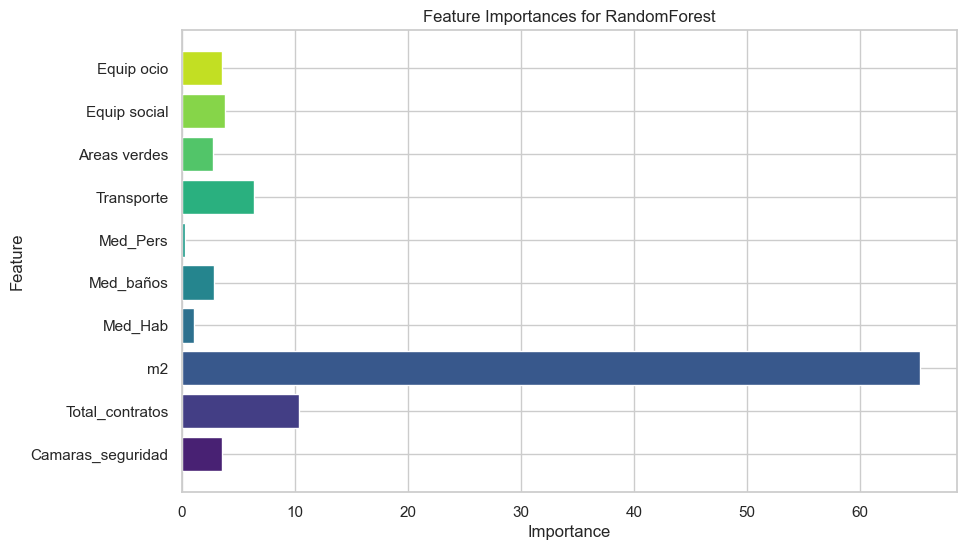

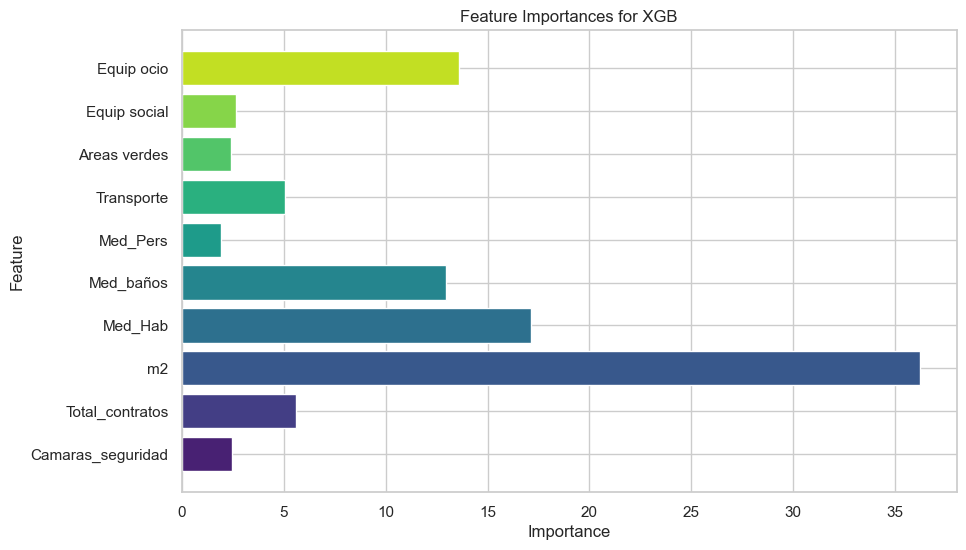

In [465]:
colors = sns.color_palette('viridis', len(feature_names))

for model_name, model in best_models:
    feature_importance = model.feature_importances_  # O .coef_ para modelos lineales
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importance*100, color=colors)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for {model_name}')
    plt.savefig('importancia_de_variables.png')
    plt.show()

La importancia de las variables en cada modelo es diversa y cambia respecto al modelo. 

In [475]:
list(predictions2.keys())[0]

'RandomForest'

In [476]:
meta_feature_importances = {}

for i, importance in enumerate(meta_feature_importance):
    meta_feature_importances[list(predictions2.keys())[i]] = importance
meta_feature_importances

{'RandomForest': 0.8164863235987779, 'XGB': 0.3566868009955199}

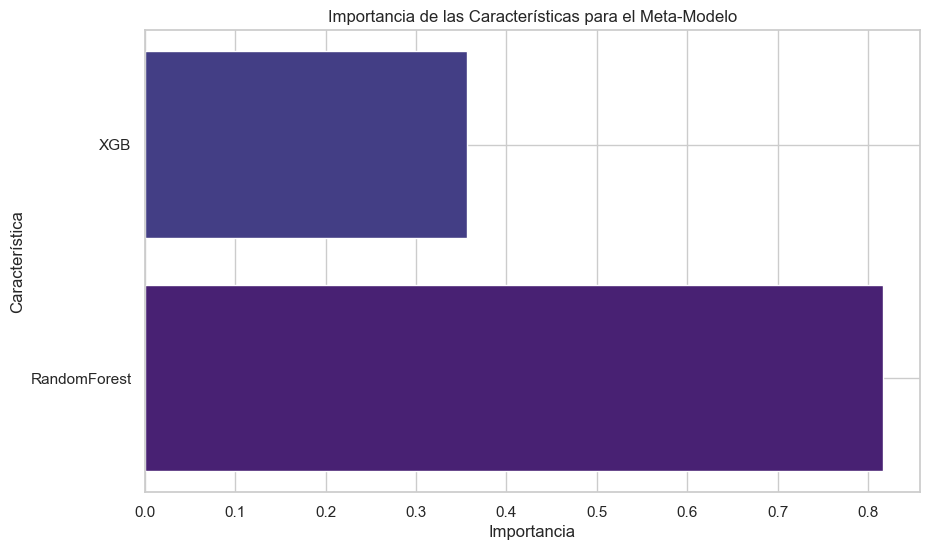

In [477]:
plt.figure(figsize=(10, 6))
plt.barh(list(meta_feature_importances.keys()), list(meta_feature_importances.values()), color=colors)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características para el Meta-Modelo')
plt.savefig('importancia de variables para meta modelo.png')
plt.show()

In [587]:
La importancia de los modelos en el Meta modelo, da mayor importancia al modelo RandomForest y menos importancia al XGB.  

SyntaxError: invalid syntax (766619285.py, line 1)

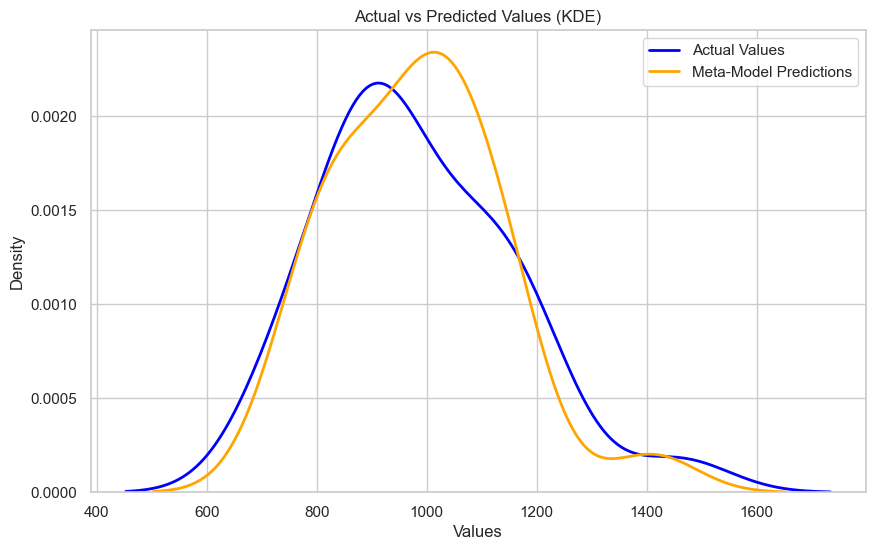

In [588]:
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Values', color='blue', linewidth=2)
sns.kdeplot(meta_preds, label='Meta-Model Predictions', color='orange', linewidth=2)

# Configurar el gráfico
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs Predicted Values (KDE)')
plt.legend()
plt.savefig('Meta modelo vs Target.png')
plt.show()

En este KDE vemos las predicciones en amarillo y el y_test (valores reales) en azul y vemos que graficamente el comportsamiento es similar, esto complementado con el grafico de dispersion, nos muestra que hay buen ajuste en nuestras predicciones y que aunque el error absoluto es alto, es controlable y entendible. 

### Conclusión final

El Meta modelo que se genero a partir de la implementación de dos modelos base, fue correcto para mejorar el ajuste de las predicciones a los datos reales, ademas podemos entender que la relación de variables y la importancia de las mismas, es uno de los aspectos mas importantes a la hora de pretender generar buenos modelos, y por tanto un buen proceso y estudio. los datos son la base de todo el proceso y su procesamiento es el cuerpo del proceso. por ello hay que tener un buen manejo de los mismos y estructurar los procesos debidamente para que todo fluya correctamente. 

La correlacion entre variables es un determinante a la hora de modelos de prediccion, saber cuales son las variables que mas afectan a la variable target, puede ayudar a tomar decisiones a la hora de crear modelos.

Es posible acercarse a la predicción del Precio de alquiler de vivienda en Barcelona. pero son necesarios mas esfuerzos gubernamentales por la recoleccion exacta y adecuada de los datos.

In [479]:
joblib.dump(best_rfr2_model, 'best_rfr2_model.joblib')
joblib.dump(best_Xg2_model, 'best_Xg2_model.joblib')
joblib.dump(meta_model, 'meta_model.joblib')

['meta_model.joblib']

In [492]:
X.to_csv('Alquiler_Norm.csv', index=False)

In [493]:
Alquiler_data.to_csv('Alquiler_Precio.csv', index=False)

In [517]:
df_predict22.to_csv('df_prediction.csv', index=False)

In [494]:
import sklearn
print(sklearn.__version__)

1.2.1
